In [0]:
# -------------------------------------------------------------------------
# Author : P. Mondal
# PCA analysis on closing stock price for company with current female CEOs
# Date : April 30, 2020
# -------------------------------------------------------------------------

# Packages Required

In [1]:
# Packages :
import pandas as pd
import pylab as pl
import json
import os
%pylab inline
import seaborn as sns

pl.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd gdrive/My\ Drive

/content/gdrive/My Drive


In [0]:
# Download stock data
# %cd gdrive/My\ Drive
# %ls *.json

In [4]:
%ls kaggle.json
!chmod 600 kaggle.json

import json
import os


kaggle.json


In [5]:
%pwd

'/content/gdrive/My Drive'

In [6]:
# Go to working directory 
%cd MLTSA\ Project
%cd Results/Priya
%mkdir data_fe_CEO_Stock
%cd data_fe_CEO_Stock
%pwd

/content/gdrive/My Drive/MLTSA Project
/content/gdrive/My Drive/MLTSA Project/Results/Priya
mkdir: cannot create directory ‘data_fe_CEO_Stock’: File exists
/content/gdrive/My Drive/MLTSA Project/Results/Priya/data_fe_CEO_Stock


'/content/gdrive/My Drive/MLTSA Project/Results/Priya/data_fe_CEO_Stock'

In [7]:
%cd ../../
%pwd


/content/gdrive/My Drive/MLTSA Project/Results


'/content/gdrive/My Drive/MLTSA Project/Results'

# Data Exploration

In [8]:
# Read data
# %cd 
%cd Priya/data

/content/gdrive/My Drive/MLTSA Project/Results/Priya/data


**Reading Data with company CEO information**



In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/rameyamey/MLTSAProject/master/RF2.csv')
# No need to drop the Nan since we are not using those columns for now
# Dropping rows with Nan values
# data = data.dropna()

In [10]:
data.head()

,Symbol,Company,Current CEO,"Gender (1 female, 2 male)",Date Employed,Age,Education Level,Number of Children they have,sector,headquarters,headquartersMSA,pop with % less than HS,Estimate!!Total!!Total population,Estimate!!Percent below poverty level!!Population for whom poverty status is determined,"Estimate!!Percent Male!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations","Estimate!!Percent Female!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations",implicit attitudes,exp1career,exp2fam
0,APD,Air Products & Chemicals Inc,Seifi Ghasemi,2,7/1/2014,76,MS,NaN,Industrial Gases,"Allentown, Pennsylvania","Allentown-Bethlehem-Easton, PA-NJ Metro Area",7.8,834615,10.7,55.2,44.8,0.363725,4.391218,3.584493
1,AES,AES Corp,Andres Gluski,2,9/1/2011,62,PhD,NaN,Independent Power Producers & Energy Traders,"Arlington, Virginia","Washington-Arlington-Alexandria, DC-VA-MD-WV M...",9.6,6138382,8.0,52.1,47.9,0.342364,4.349400,3.430855
2,AVB,"AvalonBay Communities, Inc.",Timothy Naughton,2,5/1/2013,58,MA,NaN,Residential REITs,"Arlington, Virginia[3]","Washington-Arlington-Alexandria, DC-VA-MD-WV M...",9.6,6138382,8.0,52.1,47.9,0.342364,4.349400,3.430855
3,DAL,Delta Air Lines Inc.,Ed Bastian,2,5/1/2016,62,BS,4.0,Airlines,"Atlanta, Georgia","Atlanta-Sandy Springs-Roswell, GA Metro Area",10.7,5779463,13.1,54.1,45.9,0.344999,4.355876,3.409393
4,gm,GM,Mary Barra,1,1/15/2014,58,MBA,2.0,Data Processing & Outsourced Services,"Atlanta, Georgia","Atlanta-Sandy Springs-Roswell, GA Metro Area",10.7,5779463,13.1,54.1,45.9,0.344999,4.355876,3.409393


In [11]:
# Size of initial data 
data.shape

(221, 19)

We want to make sure that we choose only those companies that have newly appointed CEO within time frame that is not too much in past say 1905 or in future.

In [12]:
# We set April 30, 2020 as our present date 
# Create datetime of April 30, 2020
 
from datetime import date
from datetime import datetime
my_date = date(2020, 4, 30) #date.today()
print('my_date is',type( my_date))
my_time = datetime.min.time()
my_datetime = datetime.combine(my_date, my_time)
print(my_datetime)

my_date is <class 'datetime.date'>
2020-04-30 00:00:00


In [0]:
data['Date Employed']

0       7/1/2014
1       9/1/2011
2       5/1/2013
3       5/1/2016
4      1/15/2014
         ...    
216     9/1/2014
217     1/1/2018
218     5/1/2016
219     3/1/2011
220     2/1/2018
Name: Date Employed, Length: 221, dtype: object

Changed date of "Date Employed" to datetime object and added column "DaysFrom Today" that counts number of days from today when the CEO was appointed!

In [13]:
import datetime
day_count = []
for ii in range(data['Date Employed'].shape[0]):
  import datetime
  if isinstance(data['Date Employed'][ii], datetime.datetime):
    day_count.append((my_datetime - data['Date Employed'][ii]).days)
  else:
    # This is silly to import datetime in a loop since importing datetime is 
    # different from importing datetime from datetime and removes one another
    from datetime import datetime
    # separate a string by delimiter
    tt = data['Date Employed'][ii].split('/')
    # print(tt)
    test_date = date(int(tt[-1]), int(tt[0]), int(tt[-2]))
    # print(test_date)
    chng_dt_time = datetime.combine(test_date, my_time)    
    print(chng_dt_time)
    # Changing date to datetime
    data['Date Employed'][ii] = chng_dt_time
    day_count.append((my_datetime - chng_dt_time).days)

data['DaysFromToday'] = day_count


2014-07-01 00:00:00
2011-09-01 00:00:00
2013-05-01 00:00:00
2016-05-01 00:00:00
2014-01-15 00:00:00
2019-10-02 00:00:00
2010-12-01 00:00:00
2018-08-01 00:00:00
2016-01-01 00:00:00
2011-05-01 00:00:00
1905-07-11 00:00:00
2002-01-01 00:00:00
2014-02-04 00:00:00
2017-03-01 00:00:00
2013-04-01 00:00:00
1905-07-07 00:00:00
2020-10-18 00:00:00
2011-01-01 00:00:00
2010-01-01 00:00:00
2020-02-14 00:00:00
2020-07-05 00:00:00
1905-06-23 00:00:00
2013-01-01 00:00:00
2017-01-01 00:00:00
2019-01-01 00:00:00
2011-09-01 00:00:00
2016-01-01 00:00:00
2020-01-01 00:00:00
1905-05-23 00:00:00
2019-06-01 00:00:00
2020-01-01 00:00:00
2018-01-01 00:00:00
2020-06-01 00:00:00
2015-01-01 00:00:00
2013-05-01 00:00:00
2020-01-13 00:00:00
2008-01-01 00:00:00
2019-01-23 00:00:00
2019-01-01 00:00:00
2020-09-17 00:00:00
2017-03-01 00:00:00
2020-11-15 00:00:00
2020-07-16 00:00:00
2016-01-01 00:00:00
1905-06-12 00:00:00
2012-01-01 00:00:00
1905-06-12 00:00:00
2019-10-01 00:00:00
1905-06-26 00:00:00
2004-05-01 00:00:00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
# Check if "DaysFromToday" column was added to dataframe 
data.head()

,Symbol,Company,Current CEO,"Gender (1 female, 2 male)",Date Employed,Age,Education Level,Number of Children they have,sector,headquarters,headquartersMSA,pop with % less than HS,Estimate!!Total!!Total population,Estimate!!Percent below poverty level!!Population for whom poverty status is determined,"Estimate!!Percent Male!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations","Estimate!!Percent Female!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations",implicit attitudes,exp1career,exp2fam,DaysFromToday
0,APD,Air Products & Chemicals Inc,Seifi Ghasemi,2,2014-07-01 00:00:00,76,MS,NaN,Industrial Gases,"Allentown, Pennsylvania","Allentown-Bethlehem-Easton, PA-NJ Metro Area",7.8,834615,10.7,55.2,44.8,0.363725,4.391218,3.584493,2130
1,AES,AES Corp,Andres Gluski,2,2011-09-01 00:00:00,62,PhD,NaN,Independent Power Producers & Energy Traders,"Arlington, Virginia","Washington-Arlington-Alexandria, DC-VA-MD-WV M...",9.6,6138382,8.0,52.1,47.9,0.342364,4.349400,3.430855,3164
2,AVB,"AvalonBay Communities, Inc.",Timothy Naughton,2,2013-05-01 00:00:00,58,MA,NaN,Residential REITs,"Arlington, Virginia[3]","Washington-Arlington-Alexandria, DC-VA-MD-WV M...",9.6,6138382,8.0,52.1,47.9,0.342364,4.349400,3.430855,2556
3,DAL,Delta Air Lines Inc.,Ed Bastian,2,2016-05-01 00:00:00,62,BS,4.0,Airlines,"Atlanta, Georgia","Atlanta-Sandy Springs-Roswell, GA Metro Area",10.7,5779463,13.1,54.1,45.9,0.344999,4.355876,3.409393,1460
4,gm,GM,Mary Barra,1,2014-01-15 00:00:00,58,MBA,2.0,Data Processing & Outsourced Services,"Atlanta, Georgia","Atlanta-Sandy Springs-Roswell, GA Metro Area",10.7,5779463,13.1,54.1,45.9,0.344999,4.355876,3.409393,2297


**# Drop the rows that have "DaysFromToday" filled with negative value since that represents future**

We are ignoring companies that are hiring new CEO in future 

In [15]:
# Drop the rows that have "DaysFromToday" filled with negative value since that 
# represents future
data_prcs1 = data[data.DaysFromToday > 0]
# Ignore day that is far in the past i.e. earliest date which goes back to 41981 
# days from today
data_prcs2 = data_prcs1[data_prcs1.DaysFromToday < max(data_prcs1.DaysFromToday)]
data_prcs2.head()

,Symbol,Company,Current CEO,"Gender (1 female, 2 male)",Date Employed,Age,Education Level,Number of Children they have,sector,headquarters,headquartersMSA,pop with % less than HS,Estimate!!Total!!Total population,Estimate!!Percent below poverty level!!Population for whom poverty status is determined,"Estimate!!Percent Male!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations","Estimate!!Percent Female!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations",implicit attitudes,exp1career,exp2fam,DaysFromToday
0,APD,Air Products & Chemicals Inc,Seifi Ghasemi,2,2014-07-01 00:00:00,76,MS,NaN,Industrial Gases,"Allentown, Pennsylvania","Allentown-Bethlehem-Easton, PA-NJ Metro Area",7.8,834615,10.7,55.2,44.8,0.363725,4.391218,3.584493,2130
1,AES,AES Corp,Andres Gluski,2,2011-09-01 00:00:00,62,PhD,NaN,Independent Power Producers & Energy Traders,"Arlington, Virginia","Washington-Arlington-Alexandria, DC-VA-MD-WV M...",9.6,6138382,8.0,52.1,47.9,0.342364,4.349400,3.430855,3164
2,AVB,"AvalonBay Communities, Inc.",Timothy Naughton,2,2013-05-01 00:00:00,58,MA,NaN,Residential REITs,"Arlington, Virginia[3]","Washington-Arlington-Alexandria, DC-VA-MD-WV M...",9.6,6138382,8.0,52.1,47.9,0.342364,4.349400,3.430855,2556
3,DAL,Delta Air Lines Inc.,Ed Bastian,2,2016-05-01 00:00:00,62,BS,4.0,Airlines,"Atlanta, Georgia","Atlanta-Sandy Springs-Roswell, GA Metro Area",10.7,5779463,13.1,54.1,45.9,0.344999,4.355876,3.409393,1460
4,gm,GM,Mary Barra,1,2014-01-15 00:00:00,58,MBA,2.0,Data Processing & Outsourced Services,"Atlanta, Georgia","Atlanta-Sandy Springs-Roswell, GA Metro Area",10.7,5779463,13.1,54.1,45.9,0.344999,4.355876,3.409393,2297


In [16]:
# Returns columns with 7 largest values in the column 'DaysFromToday'
# These are the dates far in past 

data_prcs2.nlargest(7, ['DaysFromToday'])

,Symbol,Company,Current CEO,"Gender (1 female, 2 male)",Date Employed,Age,Education Level,Number of Children they have,sector,headquarters,headquartersMSA,pop with % less than HS,Estimate!!Total!!Total population,Estimate!!Percent below poverty level!!Population for whom poverty status is determined,"Estimate!!Percent Male!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations","Estimate!!Percent Female!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations",implicit attitudes,exp1career,exp2fam,DaysFromToday
128,BLK,BlackRock,Laurence D Fink,2,1905-06-10 00:00:00,67,MBA,3.0,Asset Management & Custody Banks,"New York, New York","New York-Newark-Jersey City, NY-NJ-PA Metro Area",13.2,19990592,13.4,56.3,43.7,0.341155,4.336802,3.404641,41963
44,AFL,AFLAC Inc,Dan Amos,2,1905-06-12 00:00:00,68,BA,2.0,Life & Health Insurance,"Columbus, Georgia","Columbus, GA-AL Metro Area",10.9,307724,19.2,54.7,45.3,0.311371,4.379310,3.310345,41961
46,MNST,Monster Beverage,Rodney Sacks,2,1905-06-12 00:00:00,69,JD,NaN,Soft Drinks,"Corona, California","Riverside-San Bernardino-Ontario, CA Metro Area",20.4,4518699,15.9,56.9,43.1,0.341729,4.235991,3.363636,41961
191,NVDA,Nvidia Corporation,Jensen Huang,2,1905-06-15 00:00:00,57,MS,2.0,Semiconductors,"Santa Clara, California","San Jose-Sunnyvale-Santa Clara, CA Metro Area",10.8,1981616,8.0,54.5,45.5,0.315941,4.380360,3.434211,41958
78,SPG,Simon Property Group Inc,David Simon,2,1905-06-17 00:00:00,57,MBA,5.0,Retail REITs,"Indianapolis, Indiana","Indianapolis-Carmel-Anderson, IN Metro Area",10.6,2007497,13.2,54.2,45.8,0.340082,4.366933,3.485156,41956
81,AJG,Arthur J. Gallagher & Co.,J. Patrick Gallagher,2,1905-06-17 00:00:00,67,BA,4.0,Insurance Brokers,"Itasca, Illinois","Chicago-Naperville-Elgin, IL-IN-WI Metro Area",11.3,9536428,12.5,55.3,44.7,0.346903,4.373612,3.451667,41956
139,OMC,Omnicom Group,John Wren,2,1905-06-19 00:00:00,67,MBA,2.0,Advertising,"New York, New York","New York-Newark-Jersey City, NY-NJ-PA Metro Area",13.2,19990592,13.4,56.3,43.7,0.341155,4.336802,3.404641,41954


In [17]:
# Sort top ns numbers from the column "DaysFromToday" to get rid of days much earlier times
# This part of code was good for previous data but the new data has a lot of 
# companies that appointed CEO far in the past and hence getting rid of top ns 
# values from DaysFromToday won't make much difference
xx = (np.array(data_prcs2.DaysFromToday))
ns = 1
sort_high = xx[np.argsort(xx)[-ns:]]
#print(xx[np.argsort(xx)[-ns:]])
print(sort_high[-ns])

41963


In [18]:
len_data = (data_prcs2.index).shape[0]
# Create dataframe with DaysFromToday < sort_high[-ns]
# Again this step won't have uch effect on current dataset (was good for previous dataset)
# since current dataset has lot of older dates of CEO appointment
data_prcs3 = data_prcs2[data_prcs2.DaysFromToday < sort_high[-ns]]
print(data_prcs2.shape)
data_prcs3.shape

(198, 20)


(197, 20)

**Now we have updated dataframe named "data_prc3" with 197 companies along with their newly appointed CEO information**



In [0]:
max(data_prcs3.DaysFromToday)
# The comment below was for older dataset
# The ndataframe data_prcs3 created with new data has lot of early days and hence
# any of previous step won't have significant effect


41961

## Let us look at the new data now

In [19]:
# Companies in updated dataframe
data_prcs3['Company']

0      Air Products & Chemicals Inc
1                          AES Corp
2       AvalonBay Communities, Inc.
3              Delta Air Lines Inc.
4                                GM
                   ...             
216                   Danaher Corp.
217                        Teleflex
218              Skyworks Solutions
219                      CVS Health
220                 Dentsply Sirona
Name: Company, Length: 197, dtype: object

**Min and max date in the above data after partial cleaning**

In [20]:
# Again partial cleaning was good for oldr dataset... Didn't have much effect on new dataset
# and has a lot of older dates of CEO appointment and hence the result 
# Find the earliest date in dataframe
test = pd.to_datetime(data_prcs3['Date Employed'], errors='coerce')
print('Earliest date in dataset of appointing a CEO', min(test))
print('Latest date in dataset of appointing a CEO',max(test))
# print(data['Date Employed'])

Earliest date in dataset of appointing a CEO 1905-06-12 00:00:00
Latest date in dataset of appointing a CEO 2020-04-16 00:00:00


In [0]:
data_prcs3.columns

Index(['Symbol', 'Company', 'Current CEO', 'Gender (1 female, 2 male)',
       'Date Employed', 'Age', 'Education Level',
       'Number of Children they have', 'sector', 'headquarters',
       'headquartersMSA', 'pop with % less than HS',
       'Estimate!!Total!!Total population',
       'Estimate!!Percent below poverty level!!Population for whom poverty status is determined',
       'Estimate!!Percent Male!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations',
       'Estimate!!Percent Female!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations',
       'implicit attitudes', 'exp1career', 'exp2fam', 'DaysFromToday'],
      dtype='object')

**Are any of current CEO female ??**


In [21]:
# If yes, how many ?
curr_CEO = np.array(data_prcs3["Gender (1 female, 2 male)"])
# curr_CEO = np.array(data["Gender (1 female, 2 male)"])

count = 0
ind_fe = np.empty(len(curr_CEO))
for ii in range(len(curr_CEO)):
  if (curr_CEO[ii] == 1):
    ind_fe[ii] = ii
    count = count +1
    #print('Current Female CEO', ii)

print('Total number of current female CEO', count)

# Ans : 1 female CEO previously
print('Total number of companies', len(curr_CEO))


Total number of current female CEO 21
Total number of companies 197


In [22]:
# Name of companies and symbol : Creating list with symbol of each stock in our 
# filtered database

cmpny_name = list(data_prcs3["Company"])
cmpny_sym = data_prcs3["Symbol"].values

cmpny_fe = np.empty(count)
print('total number of company features', len(cmpny_name))

# All stock company names 
data_fe_sym = []
for ii in range(len(curr_CEO)):
  # print(ii, cmpny_sym[ii])
  data_fe_sym.append(cmpny_sym[ii]) 

  # print(cmpny_name[ii])
  # Read all stock.csv for these stocks

total number of company features 197


In [23]:
print('Number of companies in our dataset', len(data_fe_sym))

Number of companies in our dataset 197


In [24]:
%cd ../result_priya/

/content/gdrive/My Drive/MLTSA Project/Results/Priya/result_priya


In [25]:
# This allows to download data directly from yahoo finance
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=30b9f9c18c5711c6f91d5ced33762f4483579213740e4a74d71aba40bf88ff73
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [26]:
%cd ../FinalDataStock/

/content/gdrive/My Drive/MLTSA Project/Results/Priya/FinalDataStock


In [0]:
import os.path
from os import path
path.exists("BRK.B.csv")
# Download data using yahoo finance
import yfinance as yf

We want to download stock data from 2011-01-31 to 2020-4-30 for all stocks in our database

In [28]:
#Download file.csv if it is not found at given location  
for ii in data_fe_sym:
  # Check is the file is already in database
  if path.exists(ii.upper()+'.csv'):
    print(ii)
  else:
    # else download
    #print(type(ii))
    dd = yf.download(ii, start="2011-01-31", end="2020-4-30")
    dd.to_csv(ii+'.csv')



APD
AES
AVB
DAL
gm
NWL
SO
BWA
TROW
key
PCAR
SBAC
msft
ALXN
BXP
STT
BLL
BAC
WMT
MHK
AKAM
BIIB
CPB
ALB
BAX
BDX
BBY
NUE
SEE
ADM
CBOE
LMT
MSI
NTRS
NOC
M
SHW
AFL
CMI
MNST
ATO
LUV
TXN
ABMD
F
CAT
CF
MDLZ
AAPL
DVA
NEM
CAH
CHRW
FTV
GD
ZTS
AAL
DHI
AVY
ULTA
APA
BKR
COG
CNP
NOV
NBL
SYY
SPG
CE
XOM
AJG
CSX
NEE
SYK
SNA
BR
CDW
MA
CBRE
NFLX
BF.B
LNT
BSX
HSY
AZO
MAA
NI
CCL
RCL
FANG
KSS
AEP
AXP
AIG
AMT
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
INTC
TGT
DE
CTL
SWK
JNJ
ARNC
AIZ
T
BA
BMY
CPRI
GS
MCO
MS
MSCI
NWSA
NLSN
OMC
RL
SPGI
SLG
TTWO
TPR
VRTX
V
CMG
IBM
NSC
ABT
ABBV
CERN
ALL
GOOGL
BKNG
DVN
DRI
VTR
ARE
GPS
ADS
NRG
TXT
AAP
ORLY
NVR
OXY
MO
AMZN
KMX
DFS
ADP
REG
SRE
SCHW
DLR
CRM
ALGN
AVGO
CDNS
PYPL
BEN
ADSK
A
AIV
AMAT
NVDA
NOW
SIVB
SYF
ATVI
ALK
AMZN
FB
JWN
SBUX
CNC
AEE
MMM
AOS
CVX
FTNT
NTAP
NLOK
ODFL
OKE
COF
NKE
DHR
TFX
SWKS
CVS
XRAY


In [29]:
%cd ../result_priya/

/content/gdrive/My Drive/MLTSA Project/Results/Priya/result_priya


# We will remove stocks that were public much later so we have decent amount of timestamps

In [30]:
%ls ../FinalDataStock/BF.B.csv
print(data_fe_sym[75:79])
# Drop BF.B since it was public much later 
data_fe_sym.remove('BF.B')
data_fe_sym[75:79]

../FinalDataStock/BF.B.csv
['BR', 'CDW', 'MA', 'CBRE']


['BR', 'CDW', 'MA', 'CBRE']

In [0]:
data_fe_sym.remove('FTV')


In [0]:
data_fe_sym.remove('SYF')


In [0]:
data_fe_sym.remove('PYPL')


In [0]:
data_fe_sym.remove('ARNC')


In [0]:
data_fe_sym.remove('NLOK')


In [36]:
# Stocks to ignore
print('number of companies after newly established companies were removed', len(data_fe_sym))

number of companies after newly established companies were removed 191


Created a merged dataframe with eacl column being closing price of each stock in data_fe_sym and rows are the time stamps counted in unit of "Days". 

In [37]:
# ----------------------------------------------------------------------------
# While merging data of different companies, it is probably taking dates that 
# are in common and hence merging data
# ----------------------------------------------------------------------------

tss = pd.DataFrame()
tss = pd.read_csv('../FinalDataStock/' + data_fe_sym[0].upper() + '.csv')[["Date", 
	
                                "Close"]].rename({
	
      "Close": ('../FinalDataStock/' + data_fe_sym[0].upper() + 
      '.csv').replace(".csv","")}, axis=1)
# print(tss.head)                               



data_cutoff = 23 
for f in data_fe_sym[1:]:
    # print(f)
    fileread = '../FinalDataStock/' + f.upper() + '.csv'
    name = fileread.replace(".csv", "")
    
    
    tss = tss.merge(pd.read_csv(fileread)[["Date", "Close"]].rename(
	
     {"Close":name}, axis=1), on="Date")
    # print(tss.shape)

tss.set_index("Date", inplace=True)

print ("shape of the dataset:", tss.shape)
tss






shape of the dataset: (1722, 191)


,../FinalDataStock/APD,../FinalDataStock/AES,../FinalDataStock/AVB,../FinalDataStock/DAL,../FinalDataStock/GM,../FinalDataStock/NWL,../FinalDataStock/SO,../FinalDataStock/BWA,../FinalDataStock/TROW,../FinalDataStock/KEY,../FinalDataStock/PCAR,../FinalDataStock/SBAC,../FinalDataStock/MSFT,../FinalDataStock/ALXN,../FinalDataStock/BXP,../FinalDataStock/STT,../FinalDataStock/BLL,../FinalDataStock/BAC,../FinalDataStock/WMT,../FinalDataStock/MHK,../FinalDataStock/AKAM,../FinalDataStock/BIIB,../FinalDataStock/CPB,../FinalDataStock/ALB,../FinalDataStock/BAX,../FinalDataStock/BDX,../FinalDataStock/BBY,../FinalDataStock/NUE,../FinalDataStock/SEE,../FinalDataStock/ADM,../FinalDataStock/CBOE,../FinalDataStock/LMT,../FinalDataStock/MSI,../FinalDataStock/NTRS,../FinalDataStock/NOC,../FinalDataStock/M,../FinalDataStock/SHW,../FinalDataStock/AFL,../FinalDataStock/CMI,../FinalDataStock/MNST,...,../FinalDataStock/DFS,../FinalDataStock/ADP,../FinalDataStock/REG,../FinalDataStock/SRE,../FinalDataStock/SCHW,../FinalDataStock/DLR,../FinalDataStock/CRM,../FinalDataStock/ALGN,../FinalDataStock/AVGO,../FinalDataStock/CDNS,../FinalDataStock/BEN,../FinalDataStock/ADSK,../FinalDataStock/A,../FinalDataStock/AIV,../FinalDataStock/AMAT,../FinalDataStock/NVDA,../FinalDataStock/NOW,../FinalDataStock/SIVB,../FinalDataStock/ATVI,../FinalDataStock/ALK,../FinalDataStock/AMZN_y,../FinalDataStock/FB,../FinalDataStock/JWN,../FinalDataStock/SBUX,../FinalDataStock/CNC,../FinalDataStock/AEE,../FinalDataStock/MMM,../FinalDataStock/AOS,../FinalDataStock/CVX,../FinalDataStock/FTNT,../FinalDataStock/NTAP,../FinalDataStock/ODFL,../FinalDataStock/OKE,../FinalDataStock/COF,../FinalDataStock/NKE,../FinalDataStock/DHR,../FinalDataStock/TFX,../FinalDataStock/SWKS,../FinalDataStock/CVS,../FinalDataStock/XRAY
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-27,85.827934,11.96,136.470001,18.690001,33.099998,26.190001,44.000000,43.215000,73.660004,11.08,53.630001,74.440002,34.619999,93.790001,106.480003,65.550003,21.070000,13.010000,75.260002,113.669998,42.689999,208.809998,44.880001,62.750000,37.859859,98.750000,27.840000,44.080002,24.040001,33.709999,46.849998,107.360001,57.840000,58.310001,83.209999,48.150002,179.179993,29.100000,108.510002,19.883333,...,47.459999,60.904301,50.759998,82.440002,20.940001,60.270000,38.840000,36.689999,37.320000,14.600000,46.310001,34.919998,30.815451,29.980000,14.910000,14.010000,40.930000,82.870003,14.040000,26.045000,277.549988,24.660000,59.560001,32.845001,12.990000,34.380001,110.239998,18.605000,118.709999,17.309999,37.959999,28.166666,36.578533,62.689999,31.160000,48.248672,77.510002,21.600000,57.259998,41.230000
2013-06-28,84.708603,11.99,134.910004,18.709999,33.310001,26.250000,44.130001,43.075001,73.199997,11.04,53.660000,74.120003,34.540001,92.239998,105.470001,65.209999,20.770000,12.860000,74.489998,112.489998,42.549999,215.199997,44.790001,62.290001,37.626289,98.830002,27.330000,43.320000,23.950001,33.910000,46.639999,108.459999,57.730000,57.900002,82.800003,48.000000,176.600006,29.059999,108.459999,20.276667,...,47.639999,60.456539,50.810001,81.760002,21.230000,61.000000,38.180000,37.040001,37.380001,14.480000,45.340000,33.939999,30.586552,30.040001,14.920000,14.040000,40.389999,83.320000,14.260000,26.000000,277.690002,24.879999,59.939999,32.755001,13.115000,34.439999,109.349998,18.139999,118.339996,17.500000,37.779999,27.746666,36.167046,62.810001,31.840000,47.990902,77.489998,21.889999,57.180000,40.959999
2013-07-01,86.503235,11.90,135.350006,19.360001,34.000000,26.450001,43.810001,43.119999,73.669998,11.24,54.250000,74.160004,34.360001,95.860001,104.760002,65.760002,20.924999,12.930000,74.589996,112.099998,42.970001,217.880005,45.150002,63.029999,38.055405,99.250000,29.740000,43.840000,24.450001,34.349998,47.389999,108.059998,57.980000,58.759998,83.349998,48.259998,178.580002,28.834999,110.330002,20.273333,...,48.580002,60.974541,50.400002,80.550003,21.379999,60.000000,37.799999,37.790001,

In [38]:
# Are there any missing data ?
tss.isnull().values.any()
# Hence no missing data


False

Rename dataframe columns with stock symbols

In [39]:
# tss.rename(columns={"../data_fe_CEO_Stock/Data/Stocks/gps.us":"gps.us"})
tss.columns = [item for item in data_fe_sym[:]]
print(tss.shape)



(1722, 191)


## Note all closing price for each stock data correspond to each column of this new dataframe




In [0]:
tss.head()

,APD,AES,AVB,DAL,gm,NWL,SO,BWA,TROW,key,PCAR,SBAC,msft,ALXN,BXP,STT,BLL,BAC,WMT,MHK,AKAM,BIIB,CPB,ALB,BAX,BDX,BBY,NUE,SEE,ADM,CBOE,LMT,MSI,NTRS,NOC,M,SHW,AFL,CMI,MNST,...,DFS,ADP,REG,SRE,SCHW,DLR,CRM,ALGN,AVGO,CDNS,BEN,ADSK,A,AIV,AMAT,NVDA,NOW,SIVB,ATVI,ALK,AMZN,FB,JWN,SBUX,CNC,AEE,MMM,AOS,CVX,FTNT,NTAP,ODFL,OKE,COF,NKE,DHR,TFX,SWKS,CVS,XRAY
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-27,85.827934,11.96,136.470001,18.690001,33.099998,26.190001,44.000000,43.215000,73.660004,11.08,53.630001,74.440002,34.619999,93.790001,106.480003,65.550003,21.070000,13.01,75.260002,113.669998,42.689999,208.809998,44.880001,62.750000,37.859859,98.750000,27.840000,44.080002,24.040001,33.709999,46.849998,107.360001,57.840000,58.310001,83.209999,48.150002,179.179993,29.100000,108.510002,19.883333,...,47.459999,60.904301,50.759998,82.440002,20.940001,60.270000,38.840000,36.689999,37.320000,14.60,46.310001,34.919998,30.815451,29.980000,14.91,14.01,40.930000,82.870003,14.04,26.045000,277.549988,24.660000,59.560001,32.845001,12.990,34.380001,110.239998,18.605000,118.709999,17.309999,37.959999,28.166666,36.578533,62.689999,31.160000,48.248672,77.510002,21.600000,57.259998,41.230000
2013-06-28,84.708603,11.99,134.910004,18.709999,33.310001,26.250000,44.130001,43.075001,73.199997,11.04,53.660000,74.120003,34.540001,92.239998,105.470001,65.209999,20.770000,12.86,74.489998,112.489998,42.549999,215.199997,44.790001,62.290001,37.626289,98.830002,27.330000,43.320000,23.950001,33.910000,46.639999,108.459999,57.730000,57.900002,82.800003,48.000000,176.600006,29.059999,108.459999,20.276667,...,47.639999,60.456539,50.810001,81.760002,21.230000,61.000000,38.180000,37.040001,37.380001,14.48,45.340000,33.939999,30.586552,30.040001,14.92,14.04,40.389999,83.320000,14.26,26.000000,277.690002,24.879999,59.939999,32.755001,13.115,34.439999,109.349998,18.139999,118.339996,17.500000,37.779999,27.746666,36.167046,62.810001,31.840000,47.990902,77.489998,21.889999,57.180000,40.959999
2013-07-01,86.503235,11.90,135.350006,19.360001,34.000000,26.450001,43.810001,43.119999,73.669998,11.24,54.250000,74.160004,34.360001,95.860001,104.760002,65.760002,20.924999,12.93,74.589996,112.099998,42.970001,217.880005,45.150002,63.029999,38.055405,99.250000,29.740000,43.840000,24.450001,34.349998,47.389999,108.059998,57.980000,58.759998,83.349998,48.259998,178.580002,28.834999,110.330002,20.273333,...,48.580002,60.974541,50.400002,80.550003,21.379999,60.000000,37.799999,37.790001,37.610001,14.61,46.186668,33.799999,31.180258,29.959999,14.82,14.10,40.790001,86.080002,14.28,26.424999,282.100006,24.809999,61.209999,33.119999,13.135,33.950001,109.309998,18.684999,119.080002,17.280001,37.840000,28.520000,35.860619,63.590000,31.165001,49.052311,78.500000,21.920000,57.590000,41.160000
2013-07-02,83.950043,11.81,136.949997,18.990000,34.099998,26.120001,43.610001,42.480000,73.989998,11.40,53.930000,74.160004,33.939999,95.349998,106.089996,65.870003,21.090000,12.90,74.709999,110.599998,42.549999,216.649994,44.990002,63.040001,37.843563,97.139999,28.690001,43.799999,24.650000,34.869999,46.700001,106.400002,57.490002,58.630001,82.169998,48.400002,179.630005,28.395000,110.199997,20.133333,...,48.029999,61.527657,51.330002,80.400002,21.299999,60.209999,38.169998,37.299999,38.480000,14.57,46.080002,33.490002,30.822603,30.270000,14.82,14.09,41.209999,86.739998,14.32,25.975000,283.730011,24.410000,60.720001,33.395000,13.285,34.070000,108.730003,18.480000,119.150002,17.340000,38.290001,28.480000,35.396603,64.239998,31.309999,48.278999,78.010002,21.580000,58.490002,41.099998
2013-07-03,84.542091,11.83,135.729996,18.410000,34.139999,26.000000,43.400002,42.235001,74.059998,11.43,53.470001,73.980003,34.009998,96.040001,104.930000,65.809998,21.040001,12.83,74.760002,111.580002,42.689999,217.500000,44.220001,62.849998,37.696903,97.800003,29.420000,43.549999,24.959999,34.810001,46.970001,107.199997,57.259998,58.830002,82.930000,48.480000,179.839996,28.299999,108.90000

In [0]:
tss.tail()

,APD,AES,AVB,DAL,gm,NWL,SO,BWA,TROW,key,PCAR,SBAC,msft,ALXN,BXP,STT,BLL,BAC,WMT,MHK,AKAM,BIIB,CPB,ALB,BAX,BDX,BBY,NUE,SEE,ADM,CBOE,LMT,MSI,NTRS,NOC,M,SHW,AFL,CMI,MNST,...,DFS,ADP,REG,SRE,SCHW,DLR,CRM,ALGN,AVGO,CDNS,BEN,ADSK,A,AIV,AMAT,NVDA,NOW,SIVB,ATVI,ALK,AMZN,FB,JWN,SBUX,CNC,AEE,MMM,AOS,CVX,FTNT,NTAP,ODFL,OKE,COF,NKE,DHR,TFX,SWKS,CVS,XRAY
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-23,211.270004,12.69,157.449997,22.48,21.520000,12.60,56.799999,26.650000,99.160004,10.63,65.910004,306.670013,171.419998,104.139999,88.919998,57.049999,64.900002,21.870001,128.529999,77.320000,102.260002,292.250000,50.540001,60.660000,91.320000,265.079987,69.599998,37.720001,28.180000,35.740002,99.050003,376.730011,153.610001,75.610001,335.829987,4.89,498.700012,35.040001,145.429993,59.630001,...,34.820000,135.919998,35.619999,125.500000,35.639999,148.529999,151.720001,188.570007,258.929993,79.830002,15.86,175.550003,75.089996,35.139999,50.900002,284.010010,297.309998,171.000000,65.879997,28.200001,2399.449951,185.130005,17.540001,75.150002,69.239998,74.190002,144.330002,39.639999,86.800003,100.589996,41.040001,141.250000,29.200001,52.610001,87.349998,160.649994,334.429993,92.790001,61.279999,38.700001
2020-04-24,216.779999,12.86,158.380005,22.41,21.950001,12.91,57.730000,27.080000,100.339996,10.90,67.480003,305.790009,174.550003,108.120003,90.360001,57.410000,65.269997,22.180000,129.440002,78.959999,102.779999,297.799988,50.750000,61.529999,92.919998,268.170013,71.879997,37.869999,28.490000,35.990002,96.519997,381.769989,152.800003,77.389999,339.309998,5.02,506.059998,36.290001,147.770004,59.799999,...,36.230000,139.229996,35.430000,126.970001,35.400002,150.029999,153.979996,191.970001,264.809998,80.519997,15.92,180.350006,75.750000,35.090000,51.740002,289.589996,302.940002,184.000000,66.650002,28.010000,2410.219971,190.070007,17.840000,75.580002,70.580002,73.639999,147.000000,40.389999,87.010002,103.269997,43.060001,141.630005,27.660000,56.150002,88.370003,165.070007,338.390015,96.510002,62.310001,39.310001
2020-04-27,222.259995,13.28,160.750000,22.16,22.450001,13.49,58.480000,28.059999,106.500000,11.61,68.809998,308.799988,174.050003,110.860001,94.139999,61.290001,67.570000,23.469999,128.300003,83.739998,103.070000,303.239990,51.240002,62.250000,92.669998,270.000000,74.570000,40.500000,28.209999,36.540001,97.139999,378.570007,154.440002,79.910004,344.809998,5.50,511.459991,37.270000,151.440002,60.520000,...,37.439999,142.220001,37.439999,128.800003,36.840000,154.229996,157.630005,196.669998,268.450012,81.309998,16.84,182.509995,76.250000,36.570000,51.029999,297.079987,308.600006,192.630005,67.059998,27.850000,2376.000000,187.500000,20.270000,77.739998,70.820000,73.419998,153.649994,42.529999,89.709999,105.639999,42.700001,142.600006,28.520000,59.189999,89.370003,169.509995,350.079987,98.379997,63.500000,41.099998
2020-04-28,223.619995,13.63,162.470001,24.34,22.180000,14.23,58.060001,28.549999,113.889999,11.83,69.160004,305.309998,169.809998,106.919998,97.070000,62.750000,67.010002,23.889999,128.000000,87.510002,101.930000,305.220001,50.980000,64.309998,91.000000,261.920013,77.589996,40.490002,29.670000,37.169998,98.500000,384.730011,145.429993,80.129997,344.529999,5.99,508.730011,37.790001,161.080002,60.139999,...,40.060001,143.009995,40.529999,126.959999,37.080002,154.149994,154.460007,203.509995,264.730011,78.470001,17.40,177.309998,75.449997,37.209999,50.419998,291.359985,296.000000,193.250000,63.860001,31.580000,2314.080078,182.910004,20.620001,78.690002,67.169998,74.250000,157.610001,43.360001,89.910004,105.440002,42.270000,144.490005,30.530001,63.750000,88.800003,165.330002,340.269989,100.669998,63.240002,41.630001
2020-04-29,230.669998,14.32,165.809998,27.32,23.780001,14.33,57.369999,29.670000,116.919998,12.25,69.589996,291.470001,177.429993,108.449997,98.250000,64.459999,66.809998,24.780001,123.599998,93.019997,97.870003,304.709991,50.180000,64.669998,91.489998,257.850006,80.050003,42.5

# PCA : Part 1
**Remove first PCA component from dataframe**

In [40]:
print(tss.shape)
tss_fil = tss.dropna() 
print(tss_fil.shape)
# Looks like the columns that we need do not have any Nan !
# Good news :)

(1722, 191)
(1722, 191)


In [41]:
# Converting all data into array
#X_data = tss_fil.iloc[:,0: len(tss_fil.columns)].values
X_data = tss.iloc[:,0: len(tss.columns)].values

# print(X_data)
print("Shape of X_data is", X_data.shape)

Shape of X_data is (1722, 191)


# Data Standardization

In [0]:
# Set data mean  = 0 and standard deviation to unity
from sklearn.preprocessing import StandardScaler
# X_std is standardized data
X_std = StandardScaler().fit_transform(X_data)

In [43]:
X_std

array([[-1.71319747, -0.56141678, -1.48003925, ..., -2.26178894,
        -1.39612401, -1.44342652],
       [-1.74332328, -0.54906229, -1.54413315, ..., -2.25009588,
        -1.40141728, -1.47757861],
       [-1.69502234, -0.58612615, -1.52605526, ..., -2.24888622,
        -1.37428859, -1.45228071],
       ...,
       [ 1.95875149, -0.01781455, -0.4824737 , ...,  0.83406023,
        -0.98323824, -1.45987023],
       [ 1.99535471,  0.12632259, -0.41180591, ...,  0.92639544,
        -1.00044169, -1.39283071],
       [ 2.18509935,  0.4104782 , -0.27457916, ...,  1.15017732,
        -1.04212734, -1.06775393]])

In [44]:
print(X_std.shape)
print(X_std[:, 1].reshape(len(X_std), 1).shape)

(1722, 191)
(1722, 1)


# Plot 1st PCA component comtribution for the dataset 

In [0]:
# My favourite colors
col = ['b', 'r', 'g', 'k', 'c', 'm', 'y', 'darkorange', 'limegreen', 'goldenrod'
      , 'coral', 'chocolate', 'sienna', 'brown', 'maroon', 'cornflowerblue',
       'navy', 'salmon', 'mistyrose', 'peru', 'lightcoral', 'indianred', 'olive'
       ,'gold', 'seagreen', 'darkorange', 'dimgray', 'tan', 'plum', 
       'slategrey', 'crimson', 'hotpink', 'yellowgreen', 'rosybrown',
       'b', 'r', 'g', 'k', 'c', 'm', 'y', 'darkorange', 'limegreen', 'goldenrod'
      , 'coral', 'chocolate', 'sienna', 'brown', 'maroon', 'cornflowerblue',
       'navy', 'salmon', 'mistyrose', 'peru', 'lightcoral', 'indianred', 'olive'
       ,'gold', 'seagreen', 'darkorange', 'dimgray', 'tan', 'plum', 
       'slategrey', 'crimson', 'hotpink', 'yellowgreen', 'rosybrown',
       ]

SMALL_SIZE = 28
MEDIUM_SIZE = 28
BIGGER_SIZE = 28

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = 0
# principalComponents = pca.fit_transform(X_std[:, 1].reshape(len(X_std), 1))
principalComponents = pca.fit_transform(X_std)

In [47]:
principalComponents;
t_ind = np.arange(len(principalComponents));
print(principalComponents.shape)
print(t_ind.shape)
print(X_std.shape)
print(X_std[:, 1].reshape(len(X_std), 1)[:].shape)

(1722, 1)
(1722,)
(1722, 191)
(1722, 1)


In [48]:
# Inverting back to real space 
X_red_real = pca.inverse_transform(principalComponents)
X_red_real.shape

(1722, 191)

In [0]:
cmpny_name[0]
cmpny_name2 = ['']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


<Figure size 1440x720 with 0 Axes>

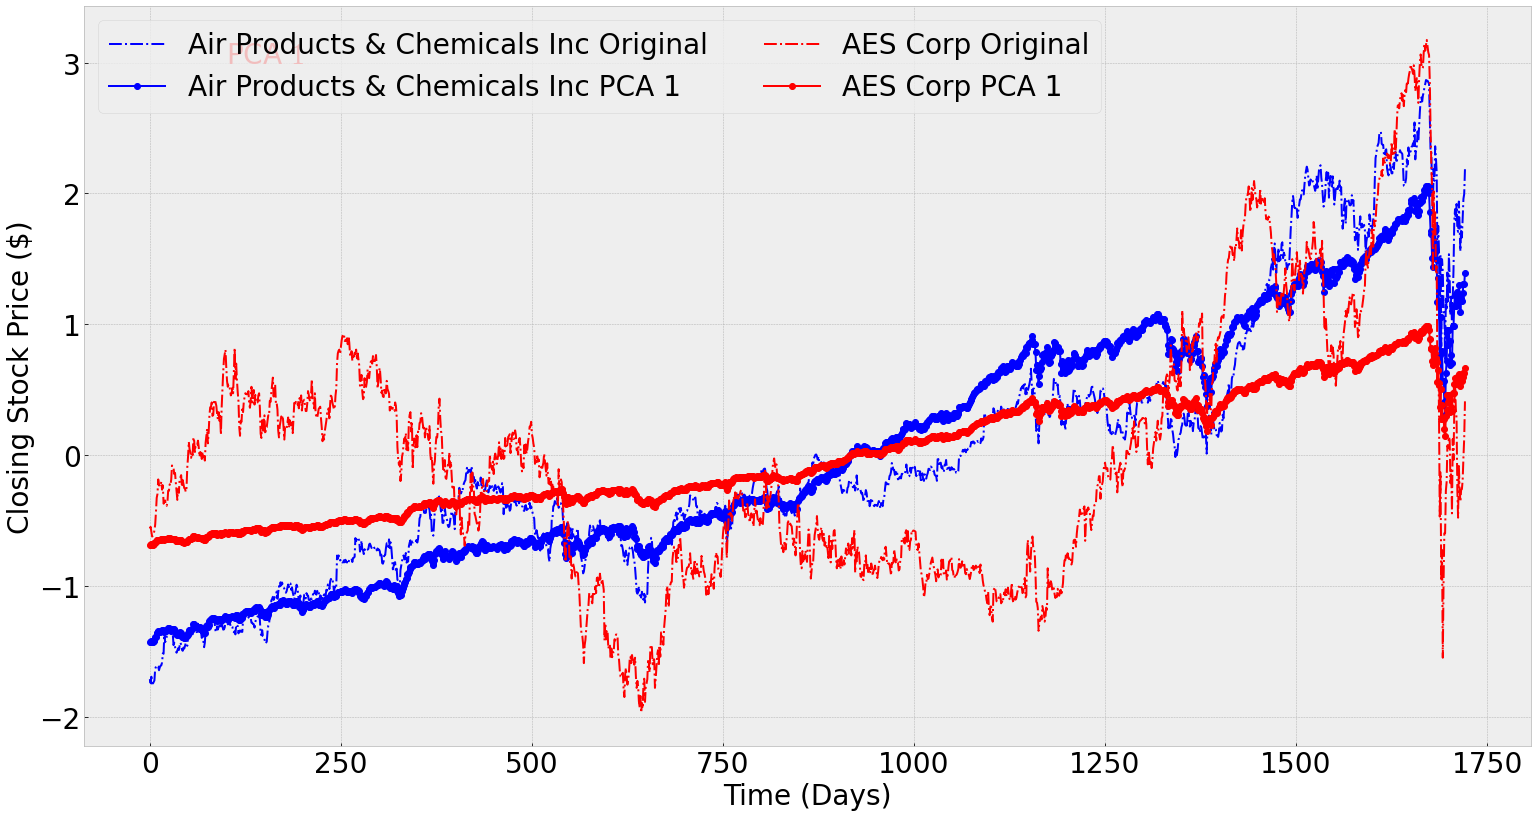

In [0]:
  pl.figure(figsize=(20,10))
  fig, ax = pl.subplots(1,1,  constrained_layout=True, figsize=(22,12)) 
  for ii in range(2) :
     pl.plot(X_std[:,ii], '-.', color=col[ii], lw = 2)
     pl.plot(X_red_real[:,ii], '-o', color=col[ii], lw = 2)


  n = 10
  ax.text(100, 3., r'PCA $1$', fontsize=SMALL_SIZE, color='red')

  SMALL_SIZE = 28
  MEDIUM_SIZE = 28
  BIGGER_SIZE = 28
  
  pl.rc('font', size=SMALL_SIZE)          # controls default text sizes
  pl.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
  pl.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
  pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
  pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
  axis_font = {'fontname':'Computer Modern Roman', 'size':'28'}
  pl.xlabel("Time (Days)", **axis_font)

  pl.ylabel("Closing Stock Price ($)", **axis_font)
  pl.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
  pl.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
  
  list_fil = ['Original', 'PCA 1']
  ax.legend([str(cmpny_name[ii]) +' '+ str(jj) for ii in range(2) 
                                          for jj in list_fil ], ncol=2)

  pl.tight_layout()
  pl.savefig('../result_priya/Correlation/ ' + 'PCA_1st_comp_contr'+ '.png')

**Computing eigenvalues and eigenvectors**

In [50]:
mean_vec = np.mean(X_std, axis=0)
print('mean is zero since data is standardized', mean_vec)

mean is zero since data is standardized [ 1.32040462e-16 -1.98060693e-16 -6.27192194e-16 -6.60202310e-17
  4.95151732e-16  0.00000000e+00 -1.98060693e-16  9.90303464e-17
  6.60202310e-17  2.64080924e-16 -2.64080924e-16  1.32040462e-16
  6.60202310e-17 -1.32040462e-16  3.63111270e-16  1.32040462e-16
 -1.32040462e-16  0.00000000e+00  2.64080924e-16 -1.32040462e-16
 -4.29131501e-16  2.31070808e-16  1.81555635e-16  2.64080924e-16
 -6.60202310e-17 -6.60202310e-17  1.32040462e-16  2.64080924e-16
  4.12626444e-16  2.37260205e-16  2.64080924e-16 -1.98060693e-16
  0.00000000e+00  2.64080924e-16 -6.60202310e-17  1.32040462e-16
 -1.98060693e-16 -1.98060693e-16 -4.62141617e-16  1.98060693e-16
  6.60202310e-17 -1.32040462e-16 -1.32040462e-16  6.60202310e-17
  1.32040462e-16 -1.32040462e-16  2.80585982e-16  4.62141617e-16
 -1.32040462e-16  1.65050577e-16  1.32040462e-16  0.00000000e+00
  6.60202310e-17 -2.64080924e-16 -6.60202310e-17  2.72333453e-16
  1.98060693e-16 -1.32040462e-16  6.60202310e-17 -

In [51]:
std_vec = np.std(X_std, axis=0)
print('std is 1 since data is standardized', std_vec)

std is 1 since data is standardized [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [52]:
# Get covariance matrix 
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0] - 1)
print('Covariance matrix is \n%s' %cov_mat)
print('Shape of covariance matrix', cov_mat.shape)
print('Covariance matrix must be square matrix of size (No. of features )', X_std.shape[1])
# Alternate 
# print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

Covariance matrix is 
[[ 1.00058106  0.57420926  0.78543604 ...  0.60979794 -0.39555217
   0.0908915 ]
 [ 0.57420926  1.00058106  0.28186853 ... -0.03054457 -0.46820639
  -0.36509778]
 [ 0.78543604  0.28186853  1.00058106 ...  0.70935815  0.00473367
   0.41456495]
 ...
 [ 0.60979794 -0.03054457  0.70935815 ...  1.00058106  0.16140268
   0.40824088]
 [-0.39555217 -0.46820639  0.00473367 ...  0.16140268  1.00058106
   0.38837176]
 [ 0.0908915  -0.36509778  0.41456495 ...  0.40824088  0.38837176
   1.00058106]]
Shape of covariance matrix (191, 191)
Covariance matrix must be square matrix of size (No. of features ) 191


In [53]:
# Shape of covariance matrix is no. of features i.e. 40 in this case
print(cov_mat.shape)
# Shape of mean_vec is also no. of features since the mean is over all 
# observations
print(mean_vec.shape)
print(X_data.shape)

(191, 191)
(191,)
(1722, 191)


# Trying to get better plot of covariance matrix

In [0]:
cov_mat.shape

(191, 191)

In [54]:
cov_df = pd.DataFrame()
cov_df

""


In [55]:
xt1 = np.arange(len(cov_mat))[0:-1:50]
xt1


array([  0,  50, 100, 150])

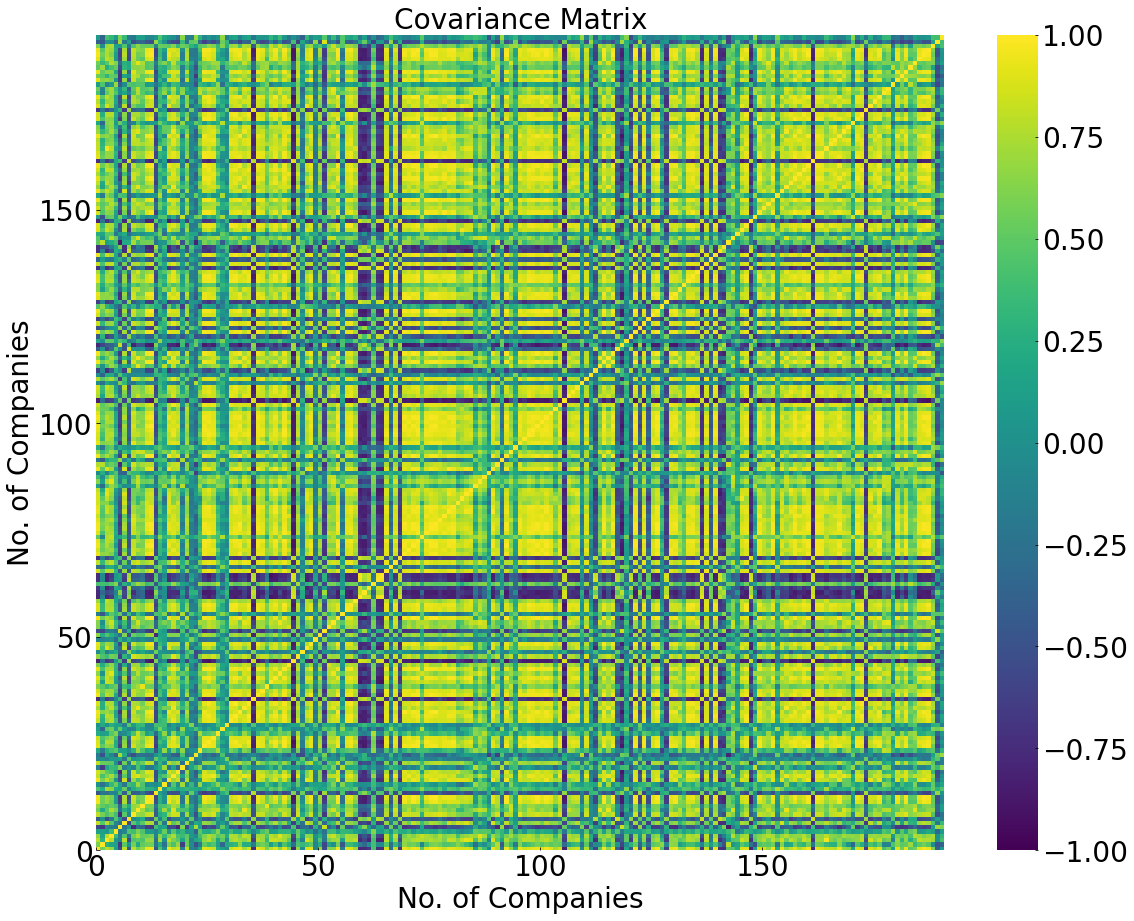

In [0]:
SMALL_SIZE = 28
MEDIUM_SIZE = 28
BIGGER_SIZE = 28

f = plt.figure(figsize=(19, 15))
ax = sns.heatmap(cov_mat, 
    vmin=-1, vmax=1, center=0, cmap='viridis')
ax.invert_yaxis()
plt.xticks(xt1, xt1, rotation=0)
plt.yticks(xt1, xt1, rotation=0)

plt.title('Covariance Matrix', fontsize=SMALL_SIZE)
pl.xlabel('No. of Companies')
pl.ylabel('No. of Companies')

plt.savefig('FinalFig/' + 'covmat2'+ '.png')


**Eigenvector decomposition of covariance matrix**

In [56]:

eig_val, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors are \n%s' %eig_vecs)
print('\n Eigvalues are \n%s' %eig_val)

Eigenvectors are 
[[ 0.08629404  0.03417011 -0.02251567 ... -0.01155428 -0.00845623
  -0.00634726]
 [ 0.04133872  0.12460156  0.06834763 ...  0.04659554 -0.05356851
  -0.00818554]
 [ 0.07202763 -0.05636606 -0.08605225 ...  0.0191721  -0.14450145
   0.0757838 ]
 ...
 [ 0.06257333 -0.11850513 -0.03032673 ...  0.06317669  0.01745043
   0.02587241]
 [-0.04188785 -0.11839131 -0.09452575 ... -0.07654396  0.07614492
   0.00113012]
 [ 0.00583601 -0.14164857 -0.10481307 ...  0.01330398 -0.0066598
   0.02467073]]

 Eigvalues are 
[ 1.18068875e+02  2.01128282e+01  1.73779228e+01  9.74085253e+00
  6.00066660e+00  4.74021692e+00  2.23261226e+00  1.77580602e+00
  1.61456136e+00  9.32424659e-01  8.17323473e-01  6.93973086e-01
  6.13445651e-01  5.25341025e-01  4.73712566e-01  4.94285948e-01
  3.83740196e-01  3.34724477e-01  3.13605411e-01  2.59448706e-01
  2.48319241e-01  2.13579320e-01  2.08820501e-01  1.68629528e-01
  1.56929620e-01  1.42343842e-01  1.29516378e-01  1.14196693e-01
  1.08624052e-01  9

**Selecting principle components**

This is an eigen value problem where the PCA components are eigenvectors corresponding to eigenvalues which provide the weight/ variance ratio of the eigenvector to overall data. One can choose a cutoff of $E_{min}$ such that only states with eigenvalue $E_n > E_{min}$ will be considered. Here we want to get rid of only 1st PCA component from our dataset.

In [57]:
eig_pairs = [(np.abs(eig_val[i]), eig_vecs[:,i]) for i in range(len(eig_val)) ]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x : x[0], reverse = True)

print('Eigenvalues in descending order are :\n')
"""
for i in eig_pairs:
  print(i[0])
"""  

Eigenvalues in descending order are :



'\nfor i in eig_pairs:\n  print(i[0])\n'

In [58]:
# First eigenvectors
eig_vecs[:,0].shape

(191,)

variance tells us how much information (variance) can be attributed to each of the principal components (which is related to eigenvalues).

In [0]:
# Calculating weight of each eigenvalues of covariance matrix
tot = sum(eig_val)
var_exp = [(i / tot)*100 for i in sorted(eig_val, reverse = True)]

In [60]:
print('Contribution of 1st PCA component', var_exp[0])

Contribution of 1st PCA component 61.78026696660493


findfont: Font family ['Computer Modern Roman'] not found. Falling back to DejaVu Sans.


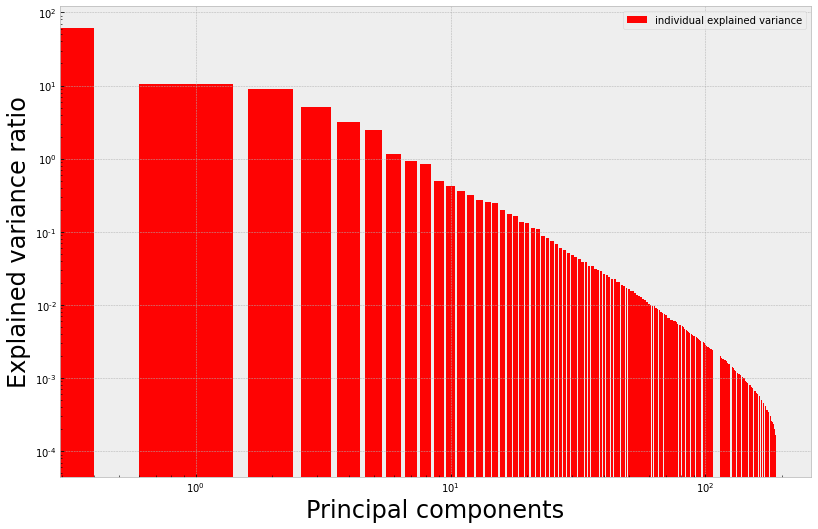

In [61]:
#with pl.style.context('dark_background'):
pl.figure(figsize=(12, 8))

pl.bar(np.arange(len(var_exp)), var_exp, alpha=0.99, color = 'red', align='center',
            label='individual explained variance')
    #pl.ylabel('Explained variance ratio')
    #pl.xlabel('Principal components')
pl.legend(loc='best')
    #pl.tight_layout()
pl.yscale('log')
pl.xscale('log')
SMALL_SIZE = 28
MEDIUM_SIZE = 28
BIGGER_SIZE = 28
  

pl.rc('font', size=SMALL_SIZE)          # controls default text sizes
  # pl.title("Correlation")  
pl.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
pl.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

axis_font = {'fontname':'Computer Modern Roman', 'size':'24'}
pl.xlabel("Principal components", **axis_font)
pl.ylabel("Explained variance ratio", **axis_font)
pl.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
pl.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
# ax.legend(['PCA COMP' + str(ii) for ii in range(n_comp)], ncol=2)
  

pl.tight_layout()
pl.savefig('../result_priya/FinalFig/ ' + 'cumu_fit'+ '.png')

Fig 1. The figure above shows somw=ething really interesting. It clarifies whether first PCA component contributes towards 60% above to oberall data, any component above $E_{16}$ are negligible and hence do not add extra information. Hence, one can work in a dimention of say size 15 instead of 33which reduces computational cost.  

**Projection Matrix**

In [62]:
eig_pairs[1][1]

array([ 3.41701120e-02,  1.24601564e-01, -5.63660589e-02, -1.04650073e-01,
       -6.40326417e-02, -1.52666609e-01,  3.35823766e-02, -2.40852750e-02,
        4.47404308e-02, -9.08484569e-02, -1.97917025e-02,  6.95355293e-02,
        5.91486836e-02, -5.60357776e-02, -1.04745999e-01, -1.36748699e-01,
        5.88459281e-02, -1.95916811e-02,  9.58378598e-02, -2.02037006e-01,
        5.73055004e-02, -6.28854281e-02, -9.75437649e-02, -1.16029377e-01,
        3.76220835e-02, -1.33376483e-02,  4.22106363e-03, -9.87748986e-02,
       -1.77053238e-01, -7.67831153e-02, -2.95907116e-02, -2.05997329e-02,
        6.74439500e-02, -7.23705760e-02, -3.09485110e-02, -1.45234145e-02,
        1.33205289e-02,  9.03788172e-03, -9.93003590e-03, -6.72929918e-02,
       -1.19855770e-03, -1.23858121e-01, -1.67994495e-03, -3.21460908e-02,
       -2.00489052e-02, -3.55772649e-04,  3.40029732e-02,  1.43784291e-03,
        2.92563202e-02, -5.35222047e-02,  1.71766732e-02, -1.28316652e-01,
       -6.62502395e-02, -

Construct projection matrix

In [63]:
# Construct matrix_w without first eigenvector to filter out contribution of 
# first PCA comp
E_size = len(eig_val)
# We do not want first PCA component
n_com = len(eig_val)-1
matrix_w = np.zeros((len(eig_val), n_com), dtype=float64)
print(matrix_w.shape)

# This part was done previously to compute only coefficients in eigenbasis

for ii in range(n_com):
  # We construct matrix_w such that i^{th} column is (i+1)^{th} eigenvector
  matrix_w[:, ii] =  eig_pairs[ii+1][1]
print('Projection Matrix W is : \n', matrix_w.shape)

(191, 190)
Projection Matrix W is : 
 (191, 190)


## Return to original basis after dropping first eigenvector (1st PCA component)

$|\psi_n\rangle = P_n|\psi\rangle$

where
$|\psi\rangle$ is original vector (consider it as each column of input data before PCA) and 

$P_n = |E_n\rangle\langle E_n|$ (a matrix)


In [0]:
# Process data i.e. remove 1st PCA component and return to original basis  
# We will store processed data in X_p; The name speaks for itself 

X_p = np.zeros(shape(X_std), dtype=float64)
for ii in range(n_com): # Change range to n_com once done
  # We construct matrix_w such that i^{th} column is (i+1)^{th} eigenvector
  row = 0
  row = eig_pairs[ii+1][1].reshape(E_size,1)
  X_p = X_p + X_std.dot( row.dot(row.T) )



In [65]:
%cd ../result_priya/FinalFig/

/content/gdrive/My Drive/MLTSA Project/Results/Priya/result_priya/FinalFig


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


<Figure size 432x288 with 0 Axes>

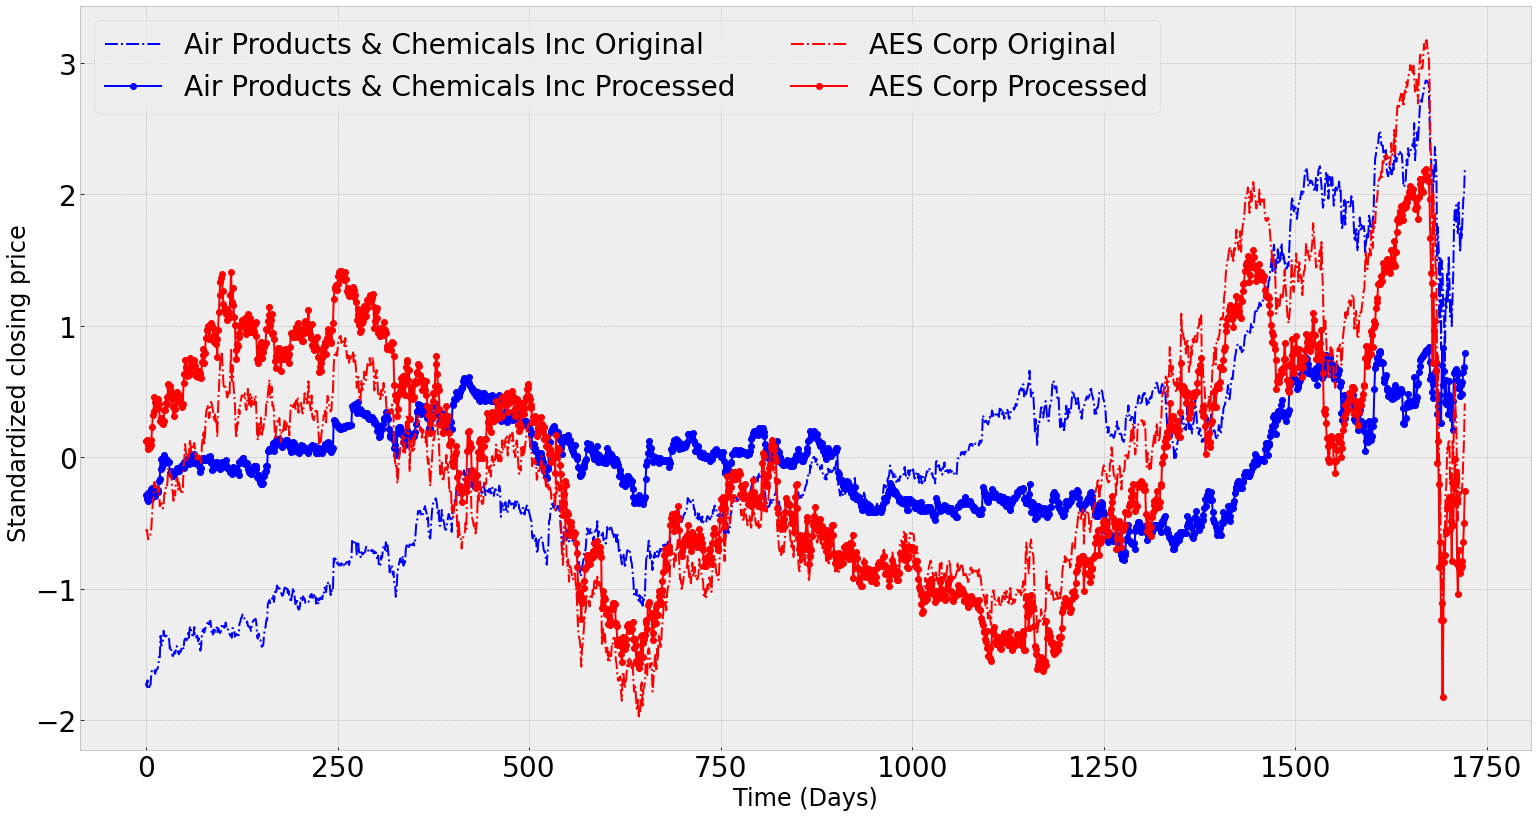

In [0]:
pl.figure()
fig, ax = pl.subplots(1,1,  constrained_layout=True, figsize=(22,12)) 

for ii in range(2):
  pl.plot(X_std[:,ii], '-.', color=col[ii], lw = 2)
  pl.plot(X_p[:,ii], '-o', color=col[ii], lw = 2)


pl.rc('font', size=SMALL_SIZE)          # controls default text sizes
# pl.title("Correlation")  
pl.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
pl.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
axis_font = {'fontname':'Computer Modern Roman', 'size':'24'}
pl.xlabel("Time (Days)", **axis_font)
pl.ylabel("Standardized closing price ", **axis_font)
pl.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
pl.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
# ax.legend(['PCA COMP' + str(ii+1) for ii in range(int(n_comp/2))], ncol=2)
list_fil = ['Original', 'Processed']
ax.legend([str(cmpny_name[ii]) +' '+ str(jj) for ii in range(2) 
                                          for jj in list_fil ], ncol=2)
# tests = [str(cmpny_name[ii]) +' '+ str(jj) for jj in list_fil  for ii in range(5)]


pl.tight_layout()
pl.savefig('../../result_priya/FinalFig/ ' + 'PCA_comp_processed_option1_final'+ '.png')


Fig 2: The figure above shows comparison of how data looks after the market trend has been removed using PCA. The data is shown in original basis. 

## Save processed data in a file

In [66]:
# Get list of column heads
col_head_p = list(tss) 
(col_head_p[0].upper())

'APD'

Create dataframe of processed data

In [0]:
Data_pr = pd.DataFrame(X_p) ; 

In [68]:
Data_pr.columns = [item.upper() for item in col_head_p[:]]
Data_pr.head()

,APD,AES,AVB,DAL,GM,NWL,SO,BWA,TROW,KEY,PCAR,SBAC,MSFT,ALXN,BXP,STT,BLL,BAC,WMT,MHK,AKAM,BIIB,CPB,ALB,BAX,BDX,BBY,NUE,SEE,ADM,CBOE,LMT,MSI,NTRS,NOC,M,SHW,AFL,CMI,MNST,...,DFS,ADP,REG,SRE,SCHW,DLR,CRM,ALGN,AVGO,CDNS,BEN,ADSK,A,AIV,AMAT,NVDA,NOW,SIVB,ATVI,ALK,AMZN,FB,JWN,SBUX,CNC,AEE,MMM,AOS,CVX,FTNT,NTAP,ODFL,OKE,COF,NKE,DHR,TFX,SWKS,CVS,XRAY
0,-0.284217,0.123129,-0.287302,-1.577358,-0.176301,-1.394839,0.286066,-0.962222,0.420510,-0.362659,-0.423134,0.113698,0.372924,-2.455366,-1.032613,-0.359478,-0.139090,0.095831,0.675413,-1.245752,-0.565862,-2.132024,-0.696347,-0.016033,0.507023,-0.076699,0.234425,-0.500613,-2.318206,-2.186440,0.076745,-0.420593,0.437535,-0.045345,-0.273601,-0.643862,0.119219,0.283914,-0.667579,-0.605022,...,-0.376650,0.122650,-1.106825,-0.458552,-0.334159,0.159858,0.015306,0.271391,-0.231206,0.417414,-0.639829,0.195534,-0.021548,-0.254783,0.093572,0.342090,0.353257,0.009956,-0.253180,-1.893747,0.299062,-0.584017,-0.610143,-0.295849,-0.169360,0.065547,-1.039149,-0.664879,0.812966,0.205926,0.568586,0.165851,-0.475919,-0.780109,-0.252237,0.135531,0.124642,-1.225610,-2.089763,-1.346786
1,-0.312803,0.136221,-0.350111,-1.574115,-0.123603,-1.390618,0.309447,-0.977269,0.396009,-0.374327,-0.417785,0.109138,0.372395,-2.513344,-1.126069,-0.385264,-0.159673,0.074797,0.629436,-1.271105,-0.575084,-1.993282,-0.708662,-0.035924,0.495358,-0.073558,0.208156,-0.600345,-2.331420,-2.140869,0.069892,-0.404976,0.436050,-0.069262,-0.276929,-0.654303,0.097584,0.280427,-0.668940,-0.575106,...,-0.358883,0.110804,-1.100492,-0.500191,-0.302880,0.189160,0.000217,0.276342,-0.228912,0.412554,-0.739183,0.175831,-0.034706,-0.244850,0.095753,0.343924,0.348076,0.018106,-0.239937,-1.896080,0.300874,-0.578051,-0.584257,-0.300455,-0.160377,0.071540,-1.066917,-0.699508,0.784928,0.214778,0.558131,0.153613,-0.505760,-0.768108,-0.212292,0.128375,0.126031,-1.212800,-2.095804,-1.380834
2,-0.274015,0.094600,-0.339973,-1.516344,0.045802,-1.368302,0.247639,-0.968013,0.414047,-0.317391,-0.339914,0.100683,0.357978,-2.374288,-1.196280,-0.345123,-0.157192,0.075915,0.627371,-1.280065,-0.551084,-1.933814,-0.658608,-0.007277,0.509889,-0.075521,0.330064,-0.536003,-2.258182,-2.040372,0.090318,-0.419976,0.433426,-0.024998,-0.280122,-0.630277,0.105489,0.242743,-0.586591,-0.584218,...,-0.279817,0.116456,-1.151694,-0.585561,-0.295925,0.141819,-0.019165,0.274784,-0.235936,0.409785,-0.645596,0.162917,-0.006263,-0.264811,0.079624,0.335313,0.343588,0.050839,-0.247307,-1.872492,0.298404,-0.589161,-0.486967,-0.284768,-0.168421,0.025750,-1.074597,-0.665145,0.839877,0.197040,0.554807,0.169328,-0.533987,-0.703523,-0.259853,0.154601,0.127793,-1.218489,-2.064057,-1.356179
3,-0.333869,0.061783,-0.266839,-1.546471,0.072983,-1.401276,0.220021,-1.037695,0.439843,-0.259088,-0.379606,0.109265,0.355994,-2.398518,-1.068575,-0.334687,-0.136790,0.080169,0.642391,-1.311893,-0.575572,-1.961673,-0.681950,-0.002607,0.507017,-0.106481,0.281650,-0.537208,-2.226563,-1.921976,0.071638,-0.431898,0.428811,-0.024713,-0.285142,-0.629453,0.124203,0.196358,-0.586949,-0.586090,...,-0.323504,0.142300,-1.038528,-0.586901,-0.296244,0.158438,-0.000704,0.278316,-0.216479,0.416716,-0.663828,0.165375,-0.020170,-0.212676,0.088186,0.343845,0.357621,0.068802,-0.237275,-1.897841,0.310204,-0.588101,-0.528321,-0.258268,-0.150826,0.043695,-1.087417,-0.673804,0.846785,0.207950,0.590563,0.177061,-0.563622,-0.638162,-0.242881,0.137466,0.131413,-1.225771,-2.008809,-1.363169
4,-0.315666,0.071106,-0.315070,-1.602995,0.083528,-1.412729,0.185789,-1.063819,0.445777,-0.247686,-0.443854,0.108058,0.360142,-2.374529,-1.175697,-0.338790,-0.138339,0.071886,0.647420,-1.290632,-0.563495,-1.943477,-0.784737,-0.010045,0.501036,-0.091511,0.323706,-0.569203,-2.179657,-1.935697,0.084735,-0.419344,0.424758,-0.010209,-0.273708,-0.626561,0.128463,0.186696,-0.647040,-0.587595,...,-0.293205,0.148882,-1.077417,-0.589245,-0.283904,0.159121,0.011228,0.285255,-0.212840,0.420112,-0.675170,0.167729,-0.014147,-0.250514,0.102867,0.346502,0.366464,0.0

In [69]:
Comp_dates_p = list(tss.index)
size(Comp_dates_p)

1722

In [70]:
Data_pr['Dates'] = Comp_dates_p 
Data_pr.head()  

,APD,AES,AVB,DAL,GM,NWL,SO,BWA,TROW,KEY,PCAR,SBAC,MSFT,ALXN,BXP,STT,BLL,BAC,WMT,MHK,AKAM,BIIB,CPB,ALB,BAX,BDX,BBY,NUE,SEE,ADM,CBOE,LMT,MSI,NTRS,NOC,M,SHW,AFL,CMI,MNST,...,ADP,REG,SRE,SCHW,DLR,CRM,ALGN,AVGO,CDNS,BEN,ADSK,A,AIV,AMAT,NVDA,NOW,SIVB,ATVI,ALK,AMZN,FB,JWN,SBUX,CNC,AEE,MMM,AOS,CVX,FTNT,NTAP,ODFL,OKE,COF,NKE,DHR,TFX,SWKS,CVS,XRAY,Dates
0,-0.284217,0.123129,-0.287302,-1.577358,-0.176301,-1.394839,0.286066,-0.962222,0.420510,-0.362659,-0.423134,0.113698,0.372924,-2.455366,-1.032613,-0.359478,-0.139090,0.095831,0.675413,-1.245752,-0.565862,-2.132024,-0.696347,-0.016033,0.507023,-0.076699,0.234425,-0.500613,-2.318206,-2.186440,0.076745,-0.420593,0.437535,-0.045345,-0.273601,-0.643862,0.119219,0.283914,-0.667579,-0.605022,...,0.122650,-1.106825,-0.458552,-0.334159,0.159858,0.015306,0.271391,-0.231206,0.417414,-0.639829,0.195534,-0.021548,-0.254783,0.093572,0.342090,0.353257,0.009956,-0.253180,-1.893747,0.299062,-0.584017,-0.610143,-0.295849,-0.169360,0.065547,-1.039149,-0.664879,0.812966,0.205926,0.568586,0.165851,-0.475919,-0.780109,-0.252237,0.135531,0.124642,-1.225610,-2.089763,-1.346786,2013-06-27
1,-0.312803,0.136221,-0.350111,-1.574115,-0.123603,-1.390618,0.309447,-0.977269,0.396009,-0.374327,-0.417785,0.109138,0.372395,-2.513344,-1.126069,-0.385264,-0.159673,0.074797,0.629436,-1.271105,-0.575084,-1.993282,-0.708662,-0.035924,0.495358,-0.073558,0.208156,-0.600345,-2.331420,-2.140869,0.069892,-0.404976,0.436050,-0.069262,-0.276929,-0.654303,0.097584,0.280427,-0.668940,-0.575106,...,0.110804,-1.100492,-0.500191,-0.302880,0.189160,0.000217,0.276342,-0.228912,0.412554,-0.739183,0.175831,-0.034706,-0.244850,0.095753,0.343924,0.348076,0.018106,-0.239937,-1.896080,0.300874,-0.578051,-0.584257,-0.300455,-0.160377,0.071540,-1.066917,-0.699508,0.784928,0.214778,0.558131,0.153613,-0.505760,-0.768108,-0.212292,0.128375,0.126031,-1.212800,-2.095804,-1.380834,2013-06-28
2,-0.274015,0.094600,-0.339973,-1.516344,0.045802,-1.368302,0.247639,-0.968013,0.414047,-0.317391,-0.339914,0.100683,0.357978,-2.374288,-1.196280,-0.345123,-0.157192,0.075915,0.627371,-1.280065,-0.551084,-1.933814,-0.658608,-0.007277,0.509889,-0.075521,0.330064,-0.536003,-2.258182,-2.040372,0.090318,-0.419976,0.433426,-0.024998,-0.280122,-0.630277,0.105489,0.242743,-0.586591,-0.584218,...,0.116456,-1.151694,-0.585561,-0.295925,0.141819,-0.019165,0.274784,-0.235936,0.409785,-0.645596,0.162917,-0.006263,-0.264811,0.079624,0.335313,0.343588,0.050839,-0.247307,-1.872492,0.298404,-0.589161,-0.486967,-0.284768,-0.168421,0.025750,-1.074597,-0.665145,0.839877,0.197040,0.554807,0.169328,-0.533987,-0.703523,-0.259853,0.154601,0.127793,-1.218489,-2.064057,-1.356179,2013-07-01
3,-0.333869,0.061783,-0.266839,-1.546471,0.072983,-1.401276,0.220021,-1.037695,0.439843,-0.259088,-0.379606,0.109265,0.355994,-2.398518,-1.068575,-0.334687,-0.136790,0.080169,0.642391,-1.311893,-0.575572,-1.961673,-0.681950,-0.002607,0.507017,-0.106481,0.281650,-0.537208,-2.226563,-1.921976,0.071638,-0.431898,0.428811,-0.024713,-0.285142,-0.629453,0.124203,0.196358,-0.586949,-0.586090,...,0.142300,-1.038528,-0.586901,-0.296244,0.158438,-0.000704,0.278316,-0.216479,0.416716,-0.663828,0.165375,-0.020170,-0.212676,0.088186,0.343845,0.357621,0.068802,-0.237275,-1.897841,0.310204,-0.588101,-0.528321,-0.258268,-0.150826,0.043695,-1.087417,-0.673804,0.846785,0.207950,0.590563,0.177061,-0.563622,-0.638162,-0.242881,0.137466,0.131413,-1.225771,-2.008809,-1.363169,2013-07-02
4,-0.315666,0.071106,-0.315070,-1.602995,0.083528,-1.412729,0.185789,-1.063819,0.445777,-0.247686,-0.443854,0.108058,0.360142,-2.374529,-1.175697,-0.338790,-0.138339,0.071886,0.647420,-1.290632,-0.563495,-1.943477,-0.784737,-0.010045,0.501036,-0.091511,0.323706,-0.569203,-2.179657,-1.935697,0.084735,-0.419344,0.424758,-0.010209,-0.273708,-0.626561,0.128463,0.186696,-0.647040,-0.587595,...,0.148882,-1.077417,-0.589245,-0.283904,0.159121,0.011228,0.285255,-0.212840,0.420112,-0.675170,0.167729,-0.014147,-0.250514,0.102867,0.346502,0.366464,0.06756

In [0]:
# Save dataframe in file.npy
Data_pr.to_csv('../dataframe_p.csv', index=False) 

In [72]:
%ls ../dataframe_p.csv

../dataframe_p.csv


# Compute covariance matrix again for processed data 

In [73]:
mean_vec2 = np.mean(X_p, axis=0)
print(mean_vec2)
cov_mat2 = (X_p - mean_vec2).T.dot((X_p - mean_vec2)) / (X_p.shape[0] - 1)

[ 2.21206457e-16 -2.52088968e-16 -5.55756241e-16 -2.25912978e-16
  3.35516877e-16 -2.32682630e-16 -1.78428700e-16  2.35906275e-16
 -1.28978000e-16  1.87745032e-16 -5.28113493e-17  1.12440706e-16
 -3.89416206e-17 -3.36435615e-16  2.06055330e-16  4.51310173e-17
  1.85037171e-17 -1.46611333e-16  3.58340277e-16 -3.43382568e-16
 -3.51248260e-16  1.92000242e-16  4.66590246e-16  2.58149419e-16
  1.77300425e-17 -1.89374483e-16 -5.96374157e-18  4.39447162e-16
  2.27073490e-16  2.34810236e-16  2.11664471e-16 -2.64612825e-16
 -1.60456885e-16  9.89014007e-17 -5.45924127e-17  8.55555142e-17
 -5.63170623e-17 -4.00892379e-16 -4.83143658e-16  1.42742960e-16
  9.43762103e-17  2.06313222e-18 -1.33733882e-16  1.03543448e-16
  1.20951126e-16 -3.48153562e-17  1.21209018e-17  6.18190168e-16
 -9.54198651e-17  2.87677999e-16  1.09088116e-16 -2.84389882e-16
  1.03801340e-16 -2.91675317e-16  3.47508833e-17 -9.79987803e-18
  1.07802688e-16 -8.55877506e-17 -2.68013770e-16 -6.10558191e-17
  7.47885429e-17 -1.88744

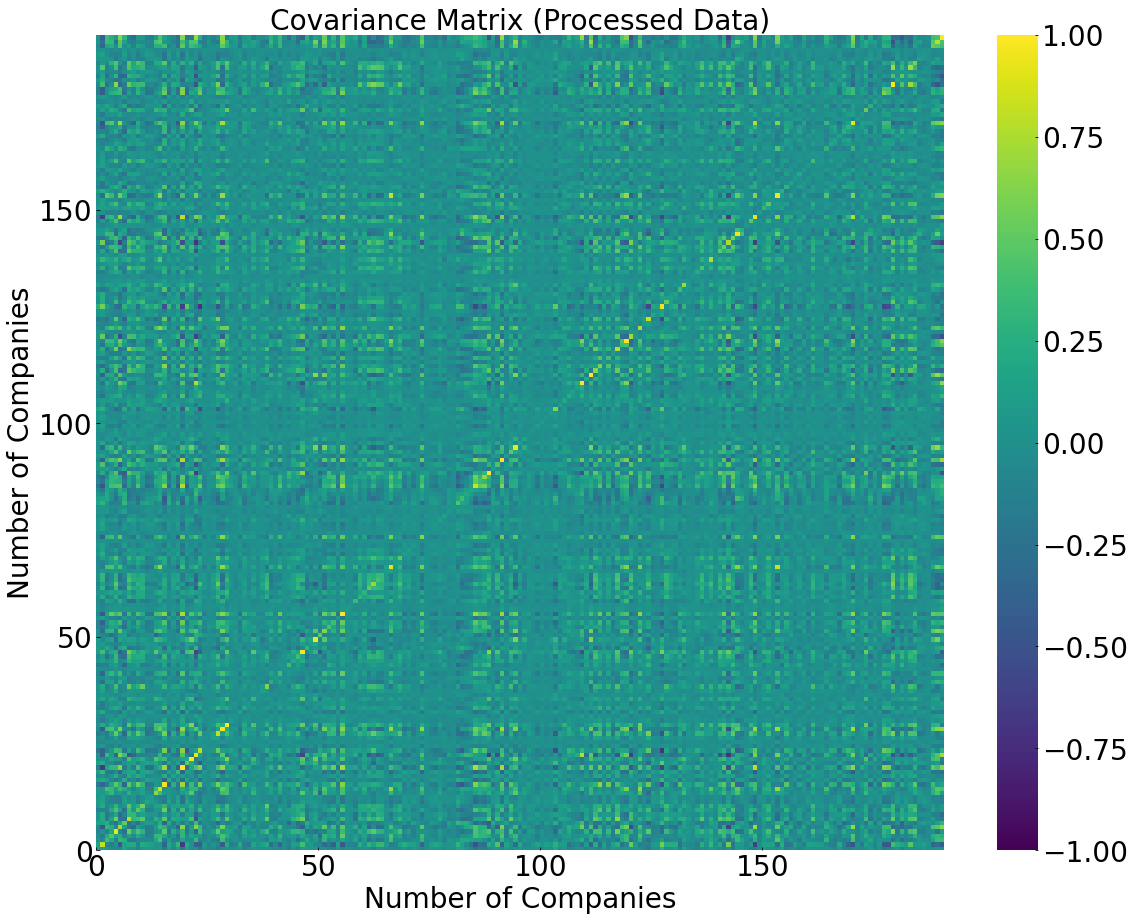

In [0]:

SMALL_SIZE = 28
MEDIUM_SIZE = 28
BIGGER_SIZE = 28

f = plt.figure(figsize=(19, 15))
ax = sns.heatmap(cov_mat2, 
    vmin=-1, vmax=1, center=0, cmap='viridis')
ax.invert_yaxis()
plt.xticks(xt1, xt1, rotation=0)
plt.yticks(xt1, xt1, rotation=0)
pl.xlabel('Number of Companies')
pl.ylabel('Number of Companies')
plt.title('Covariance Matrix (Processed Data)', fontsize=SMALL_SIZE)
plt.savefig('../FinalFig/' + 'covmat_p'+ '.png')


## Load saved data

In [74]:
%ls ../dataframe_p.csv
# Load dataframe
datafrm_load = pd.read_csv('../dataframe_p.csv') 


../dataframe_p.csv


In [75]:
datafrm_load.head()

,APD,AES,AVB,DAL,GM,NWL,SO,BWA,TROW,KEY,PCAR,SBAC,MSFT,ALXN,BXP,STT,BLL,BAC,WMT,MHK,AKAM,BIIB,CPB,ALB,BAX,BDX,BBY,NUE,SEE,ADM,CBOE,LMT,MSI,NTRS,NOC,M,SHW,AFL,CMI,MNST,...,ADP,REG,SRE,SCHW,DLR,CRM,ALGN,AVGO,CDNS,BEN,ADSK,A,AIV,AMAT,NVDA,NOW,SIVB,ATVI,ALK,AMZN.1,FB,JWN,SBUX,CNC,AEE,MMM,AOS,CVX,FTNT,NTAP,ODFL,OKE,COF,NKE,DHR,TFX,SWKS,CVS,XRAY,Dates
0,-0.284217,0.123129,-0.287302,-1.577358,-0.176301,-1.394839,0.286066,-0.962222,0.420510,-0.362659,-0.423134,0.113698,0.372924,-2.455366,-1.032613,-0.359478,-0.139090,0.095831,0.675413,-1.245752,-0.565862,-2.132024,-0.696347,-0.016033,0.507023,-0.076699,0.234425,-0.500613,-2.318206,-2.186440,0.076745,-0.420593,0.437535,-0.045345,-0.273601,-0.643862,0.119219,0.283914,-0.667579,-0.605022,...,0.122650,-1.106825,-0.458552,-0.334159,0.159858,0.015306,0.271391,-0.231206,0.417414,-0.639829,0.195534,-0.021548,-0.254783,0.093572,0.342090,0.353257,0.009956,-0.253180,-1.893747,0.299062,-0.584017,-0.610143,-0.295849,-0.169360,0.065547,-1.039149,-0.664879,0.812966,0.205926,0.568586,0.165851,-0.475919,-0.780109,-0.252237,0.135531,0.124642,-1.225610,-2.089763,-1.346786,2013-06-27
1,-0.312803,0.136221,-0.350111,-1.574115,-0.123603,-1.390618,0.309447,-0.977269,0.396009,-0.374327,-0.417785,0.109138,0.372395,-2.513344,-1.126069,-0.385264,-0.159673,0.074797,0.629436,-1.271105,-0.575084,-1.993282,-0.708662,-0.035924,0.495358,-0.073558,0.208156,-0.600345,-2.331420,-2.140869,0.069892,-0.404976,0.436050,-0.069262,-0.276929,-0.654303,0.097584,0.280427,-0.668940,-0.575106,...,0.110804,-1.100492,-0.500191,-0.302880,0.189160,0.000217,0.276342,-0.228912,0.412554,-0.739183,0.175831,-0.034706,-0.244850,0.095753,0.343924,0.348076,0.018106,-0.239937,-1.896080,0.300874,-0.578051,-0.584257,-0.300455,-0.160377,0.071540,-1.066917,-0.699508,0.784928,0.214778,0.558131,0.153613,-0.505760,-0.768108,-0.212292,0.128375,0.126031,-1.212800,-2.095804,-1.380834,2013-06-28
2,-0.274015,0.094600,-0.339973,-1.516344,0.045802,-1.368302,0.247639,-0.968013,0.414047,-0.317391,-0.339914,0.100683,0.357978,-2.374288,-1.196280,-0.345123,-0.157192,0.075915,0.627371,-1.280065,-0.551084,-1.933814,-0.658608,-0.007277,0.509889,-0.075521,0.330064,-0.536003,-2.258182,-2.040372,0.090318,-0.419976,0.433426,-0.024998,-0.280122,-0.630277,0.105489,0.242743,-0.586591,-0.584218,...,0.116456,-1.151694,-0.585561,-0.295925,0.141819,-0.019165,0.274784,-0.235936,0.409785,-0.645596,0.162917,-0.006263,-0.264811,0.079624,0.335313,0.343588,0.050839,-0.247307,-1.872492,0.298404,-0.589161,-0.486967,-0.284768,-0.168421,0.025750,-1.074597,-0.665145,0.839877,0.197040,0.554807,0.169328,-0.533987,-0.703523,-0.259853,0.154601,0.127793,-1.218489,-2.064057,-1.356179,2013-07-01
3,-0.333869,0.061783,-0.266839,-1.546471,0.072983,-1.401276,0.220021,-1.037695,0.439843,-0.259088,-0.379606,0.109265,0.355994,-2.398518,-1.068575,-0.334687,-0.136790,0.080169,0.642391,-1.311893,-0.575572,-1.961673,-0.681950,-0.002607,0.507017,-0.106481,0.281650,-0.537208,-2.226563,-1.921976,0.071638,-0.431898,0.428811,-0.024713,-0.285142,-0.629453,0.124203,0.196358,-0.586949,-0.586090,...,0.142300,-1.038528,-0.586901,-0.296244,0.158438,-0.000704,0.278316,-0.216479,0.416716,-0.663828,0.165375,-0.020170,-0.212676,0.088186,0.343845,0.357621,0.068802,-0.237275,-1.897841,0.310204,-0.588101,-0.528321,-0.258268,-0.150826,0.043695,-1.087417,-0.673804,0.846785,0.207950,0.590563,0.177061,-0.563622,-0.638162,-0.242881,0.137466,0.131413,-1.225771,-2.008809,-1.363169,2013-07-02
4,-0.315666,0.071106,-0.315070,-1.602995,0.083528,-1.412729,0.185789,-1.063819,0.445777,-0.247686,-0.443854,0.108058,0.360142,-2.374529,-1.175697,-0.338790,-0.138339,0.071886,0.647420,-1.290632,-0.563495,-1.943477,-0.784737,-0.010045,0.501036,-0.091511,0.323706,-0.569203,-2.179657,-1.935697,0.084735,-0.419344,0.424758,-0.010209,-0.273708,-0.626561,0.128463,0.186696,-0.647040,-0.587595,...,0.148882,-1.077417,-0.589245,-0.283904,0.159121,0.011228,0.285255,-0.212840,0.420112,-0.675170,0.167729,-0.014147,-0.250514,0.102867,0.346502,0.366464,0.067

In [0]:
datafrm_load.shape

(1722, 192)

# Compute cumulative return value

In [76]:
# Get CEO appointment date for comapnies in our database
# Day zero is first day of our prepaed stock database i.e. datafrm_load
# This is our day zero 
day0 = datafrm_load.Dates[0]
# Convert day0 to date object
d0 = date(int(day0[0:4]), int(day0[5:7]), int(day0[8:10]))
data_ind = np.zeros((1,len(data_fe_sym)), dtype=float64)

cnt = 0
for jj in range(len(data_fe_sym)):
  ii = data_fe_sym[jj]
  # Getting day of appointment for each company in our database
  dp_app = data_prcs3[data_prcs3.Symbol==ii]['Date Employed'].values[0]
  # Converting datetime obj to str
  dp_app2 = dp_app.strftime("%Y-%m-%d %H:%M:%S.%f")
  dp_app3 = dp_app2[0:10].split('-') 
  d1 = date(int(dp_app3[0]), int(dp_app3[1]), int(dp_app3[2]))

  # How many days from first day of our dataset was the CEO appointed
  delta = (d1 - d0).days
  if delta < 0:
    # print('not in dataset', ii, delta)
    cnt = cnt + 1
  #print('This is the index of our dataframe from which we will use 100 day' +
  #                              'later and 120 day before observations', delta)
  else:
    # Store the index value at the same array index number as company sym in data_fe_sym
    data_ind[0, jj] = delta

print('These many appointment dates are excluded', cnt)

not in dataset AES -665
not in dataset AVB -57
not in dataset SO -939
not in dataset key -788
not in dataset PCAR -39433
not in dataset SBAC -4195
not in dataset BXP -87
not in dataset STT -39437
not in dataset BLL -908
not in dataset BAC -1273
not in dataset MHK -39451
not in dataset AKAM -177
not in dataset ALB -665
not in dataset CBOE -57
not in dataset MSI -2004
not in dataset AFL -39462
not in dataset CMI -543
not in dataset MNST -39462
not in dataset LUV -39448
not in dataset TXN -3344
not in dataset ABMD -2948
not in dataset AAPL -696
not in dataset GD -39440
not in dataset ULTA -26
not in dataset COG -4075
not in dataset SPG -39457
not in dataset AJG -39457
not in dataset NEE -361
not in dataset SYK -269
not in dataset SNA -39445
not in dataset MA -1092
not in dataset CBRE -208
not in dataset NFLX -5781
not in dataset BSX -238
not in dataset AZO -2310
not in dataset MAA -4287
not in dataset FANG -543
not in dataset KSS -39439
not in dataset AEP -39442
not in dataset AMT -3557
n

In [0]:
from scipy import stats

In [79]:
# Get data of day of appointment of CEO
# Total number of days
dim = datafrm_load.shape[0]
POC = np.zeros((5,len(data_fe_sym)), dtype=float64)
# POC = np.zeros((5, 61), dtype=float64)
POC[:] = np.nan

itm = [161]
count0 = 0
for ii in range(len(data_fe_sym)):
  c_sym = data_fe_sym[ii].upper()
  # If total number of days from today to CEO appointment is greater than total 
  # no. of days in database, ignore 
  day_ap = data_ind[0][ii]
  if day_ap < dim:
    # Values 100 days including & after appointment for stock symbol "c_sym"
    aftr = datafrm_load[c_sym].values[int(day_ap): int(day_ap)+100]
    # 120 days before appointment
    bfr = datafrm_load[c_sym].values[int(day_ap)-1: int(day_ap)-1-120:-1]
    # print('total days before appointment',(int(day_ap)-1 - (int(day_ap)-1-120) ))
    # print(bfr)
    # POC[ii] = np.mean(X_p[app_dt:app_dt + 100, 4]) - np.mean(X_p[app_dt-120:app_dt, 4])
    #POC[0, ii] = np.mean(aftr) - np.mean(bfr)
    POC[0, ii] = np.mean(aftr) - np.mean(bfr)
   
    # Get entire time series from 120 days before appointment to 100 days after 
    # the CEO appointment : 
    # total no. of days = 120 + 1(day of appointment) + 100
    tot_tm = datafrm_load[c_sym].values[int(day_ap)-1-120: int(day_ap)+100]
    
    # print(tot_tm.shape)
    # Store standard deviation for each time series 
    POC[1, ii] = np.std(tot_tm) 
    
    # Perform a t-test on the time series for each company
    # It will tell us how reliable those differences are 
    t_val = 0
    p_val = 0
    t_val, p_val = stats.ttest_ind(bfr,aftr)
    POC[2, ii] = t_val
    POC[3, ii] = p_val 
    POC[4, ii] = ii
    # print(ii, mean(bfr), mean(aftr), POC[0, count0], POC[1, count0], POC[2, count0], POC[3, count0])
    # print(datafrm_load[c_sym].values.any())
    # print(bfr, day_ap, c_sym)
    # print(np.mean(bfr))
    # print(count0)
    count0 = count0 + 1 

  else:
    # print(ii, POC[0, ii], day_ap)
    ii

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [80]:
POC_d = pd.DataFrame()
POC_d['POC_c'] = POC[0,:]
POC_d['err'] = POC[1, :]
POC_d['t_val'] = POC[2, :]
POC_d['p_val'] = POC[3, :]
POC_d.shape

(191, 4)

In [0]:
# Fill out Nan values with interpolated data for stocks that we out of range 
# from our sorted time series i.e. July, 2013 to April, 2020
POC_d = POC_d.interpolate(method = 'polynomial', order=2)


In [82]:

POC_f = POC_d.POC_c.values
POC_err = POC_d.err.values
POC_t_val = POC_d.t_val.values
POC_p_val = POC_d.p_val.values

no_com = np.arange(datafrm_load.shape[1]-1)
POC_f.shape, POC_err.shape, no_com.shape 
POC_f.shape, POC_err.shape, POC_t_val.shape, POC_p_val.shape, no_com.shape 

((191,), (191,), (191,), (191,), (191,))

## What about female CEO performance

In [123]:
# Find company symbol for male and female CEO
data_fem = []
data_male = []
count_fem = 0
count_male = 0

for jj in range(len(data_fe_sym)):
  ii = data_fe_sym[jj]
  df2 = data_prcs3[data_prcs3.Symbol==ii]
  if df2['Gender (1 female, 2 male)'].values[0] == 1:
    # print(ii)
    # Get index of stocks with female CEO that is stored in POC_f
    data_fem.append(jj)
    count_fem = count_fem + 1
  else:
    data_male.append(jj)
    count_male = count_male + 1
    
print('No. of companies hiring female CEO', count_fem)
print('No. of companies hiring male CEO', count_male)

No. of companies hiring female CEO 20
No. of companies hiring male CEO 171


In [0]:
# Get POC for female CEO companies from item index in data_fem
POC_fem  = [POC_f[item] for item in data_fem]
POC_fem_err = [POC_err[item] for item in data_fem]
POC_fem_t_val = [POC_t_val[item] for item in data_fem]
POC_fem_p_val = [POC_p_val[item] for item in data_fem]


In [0]:
# Get POC for male CEO companies from item index in data_fem
POC_male  = [POC_f[item] for item in data_male]
POC_male_err = [POC_err[item] for item in data_male]
POC_male_t_val = [POC_t_val[item] for item in data_male]
POC_male_p_val = [POC_p_val[item] for item in data_male]

In [85]:
len(POC_fem), len(POC_fem_err)

(20, 20)

In [86]:
no_com_fe = np.arange(len(data_fem))
type(no_com_fe[9])
col[5:10]

['m', 'y', 'darkorange', 'limegreen', 'goldenrod']

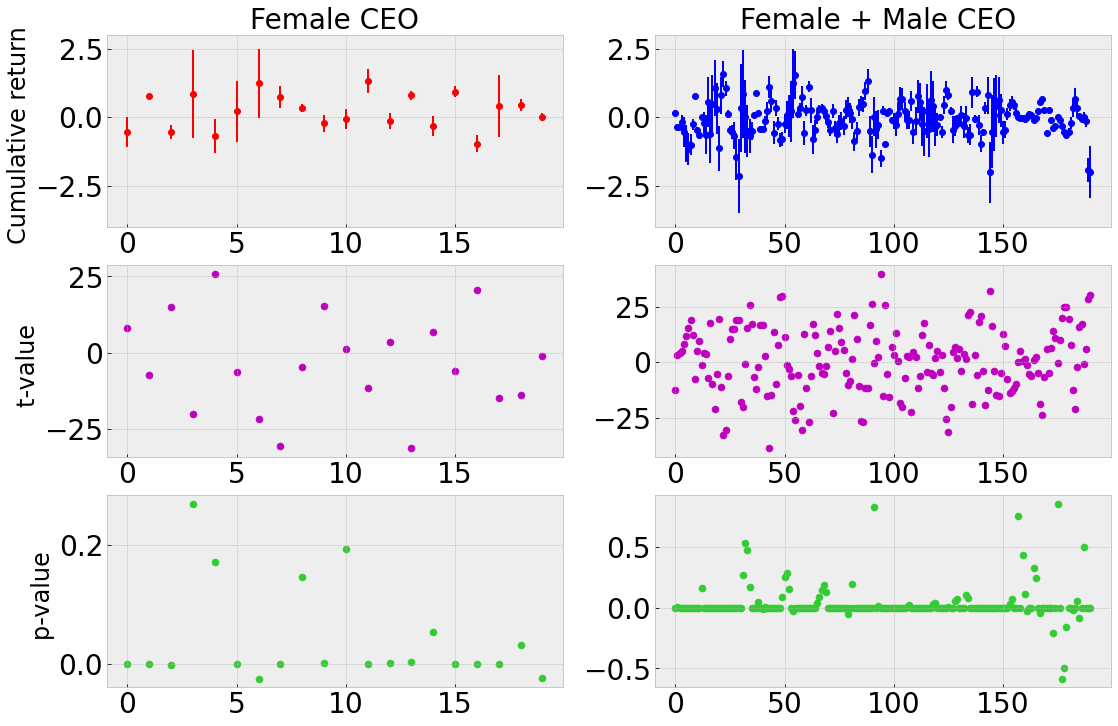

In [87]:
ax = pl.figure(figsize=(18,12))
pl.subplot(321)
pl.errorbar(np.arange(len(data_fem)), POC_fem, yerr=POC_fem_err, fmt = 'o', 
                                                            color='red', ms=6)
pl.ylabel("Cumulative return ", **axis_font)
pl.title('Female CEO')
pl.ylim((-4, 3))   # set the xlim to left, right

pl.subplot(322)
pl.errorbar(no_com[:], POC_f, yerr=POC_err, fmt = 'o', 
                                                            color='blue', ms=6)
pl.ylim((-4, 3))   # set the xlim to left, right
pl.title('Female + Male CEO ')

pl.subplot(323)
pl.scatter(np.arange(len(data_fem)), POC_fem_t_val, color=col[5], s=50, label="female")
pl.ylabel("t-value ", **axis_font)

pl.subplot(324)
pl.scatter(no_com[:], POC_t_val, color=col[5], s = 50, label="all")

pl.subplot(325)
pl.scatter(np.arange(len(data_fem)), POC_fem_p_val, color=col[8], s=50, label="female")
pl.ylabel("p-value ", **axis_font)

pl.subplot(326)
pl.scatter(no_com[:], POC_p_val, color=col[8], s = 50, label="all")


pl.savefig( 'POC_female_all'+ '.png')


**Get distribution of number of companies with profit mergin i.e. what fraction had Profit , zero gain (Stable), Loss**

**Check how many p-value for female CEO vs all CEOs are under 5%**

In [115]:
# No. of companies with female CEO with p-value below 5 %
tol = 0.05 
thrsld_val_fem = 0
get_ind_fem = []
for ii in range(len(POC_fem_p_val)):
  if POC_fem_p_val[ii] < tol:
    thrsld_val_fem = thrsld_val_fem + 1
    # Get indices for the companies with p-value below 5%
    get_ind_fem.append(ii)
print('No. of companies with female CEO out of total 20 companies with p-values'
                                        +' below 5 percent is', thrsld_val_fem)

# No. of companies with female CEO with p-value below 5 %
thrsld_val_a = 0
get_ind_a = []

for ii in range(len(POC_p_val)):
  if POC_p_val[ii] < tol:
    thrsld_val_a = thrsld_val_a + 1
    get_ind_a.append(ii)
print('No. of companies with all CEO out of 191 total companies with p-values'
                                           +' below 5 percent is', thrsld_val_a)




No. of companies with female CEO out of total 20 companies with p-values below 5 percent is 15
No. of companies with all CEO out of 191 total companies with p-values below 5 percent is 163


In [127]:
# No. of companies with male CEO with p-value below 5 %
thrsld_val_m = 0
get_ind_m = []

for ii in range(len(POC_male_p_val)):
  if POC_male_p_val[ii] < tol:
    thrsld_val_m = thrsld_val_m + 1
    get_ind_m.append(ii)
print('No. of companies with male CEO out of 171 total companies with p-values'
                                           +' below 5 percent is', thrsld_val_m)

No. of companies with male CEO out of 171 total companies with p-values below 5 percent is 148


In [128]:
print('percentage, female, male, all', 15/20, 148/171, 163/191 )

percentage, female, male, all 0.75 0.8654970760233918 0.8534031413612565


In [119]:
len(xf)

3

In [113]:
def profit_mergin(data_POC):
  """returns 3 number based on profit , stable, loss
  """  
  # How many are positive
  pos = 0
  neg = 0
  stbl = 0
  for ii in data_POC:
    # print(ii)
    if ii > 0:
      pos = pos+1
    elif ii < 0:
      neg = neg + 1
    else:
      stbl = stbl + 1

  return (pos, stbl, neg)

# Number of companies with profit, stable, loss with female CEO
xf = 0
xf = profit_mergin(POC_fem)
print('female', xf)

# Number of companies with profit, stable, loss over all
xa = profit_mergin(POC_f)
print(xa)
# Get male number
xm = [xa[ii] - xf[ii] for ii in range(len(xf))]
print('male', xm)

female (12, 0, 8)
(92, 0, 99)
male [80, 0, 91]


In [117]:
# How many of female CEO companies with p-value below 5% had profit 
POC_fem_p_val_tol = [POC_fem[ii] for ii in get_ind_fem]
print(len(POC_fem_p_val_tol), len(get_ind_fem))
xf_tol = profit_mergin(POC_fem_p_val_tol)
print('Female company with p-value below 5% : Profit, Stable : Loss', xf_tol)


15 15
female company with p-value below 5% : Profit, Stable : Loss (10, 0, 5)


In [118]:
# How many of all CEO companies with p-value below 5% had profit 
POC_all_p_val_tol = [POC_f[ii] for ii in get_ind_a]
print(len(POC_all_p_val_tol), len(get_ind_a))
xa_tol = profit_mergin(POC_all_p_val_tol)
print('All company with p-value below 5% : Profit, Stable : Loss', xa_tol)


163 163
female company with p-value below 5% : Profit, Stable : Loss (78, 0, 85)


In [129]:
# How many of male CEO companies with p-value below 5% had profit 
POC_male_p_val_tol = [POC_male[ii] for ii in get_ind_m]
print(len(POC_male_p_val_tol), len(get_ind_m))
xm_tol = profit_mergin(POC_male_p_val_tol)
print('Male company with p-value below 5% : Profit, Stable : Loss', xm_tol)


148 148
Male company with p-value below 5% : Profit, Stable : Loss (68, 0, 80)


In [0]:
xtk = ['Profit', 'Stable', 'Loss']
print([i for i in xtk])


['Profit', 'Stable', 'Loss']


In [0]:
# Normalize data to get percentage for male and female both 
xm_arr = np.array(xm)
xm_arr2 = xm_arr*(1/sum(xm_arr))
print(xm_arr2)

xf_arr = np.array(xf)
xf_arr2 = xf_arr*(1/sum(xf_arr))
print(xf_arr2)
print(np.sqrt(xf_arr2))
print(xf, xm)

[0.46783626 0.         0.53216374]
[0.6 0.  0.4]
[0.77459667 0.         0.63245553]
(12, 0, 8) [80, 0, 91]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


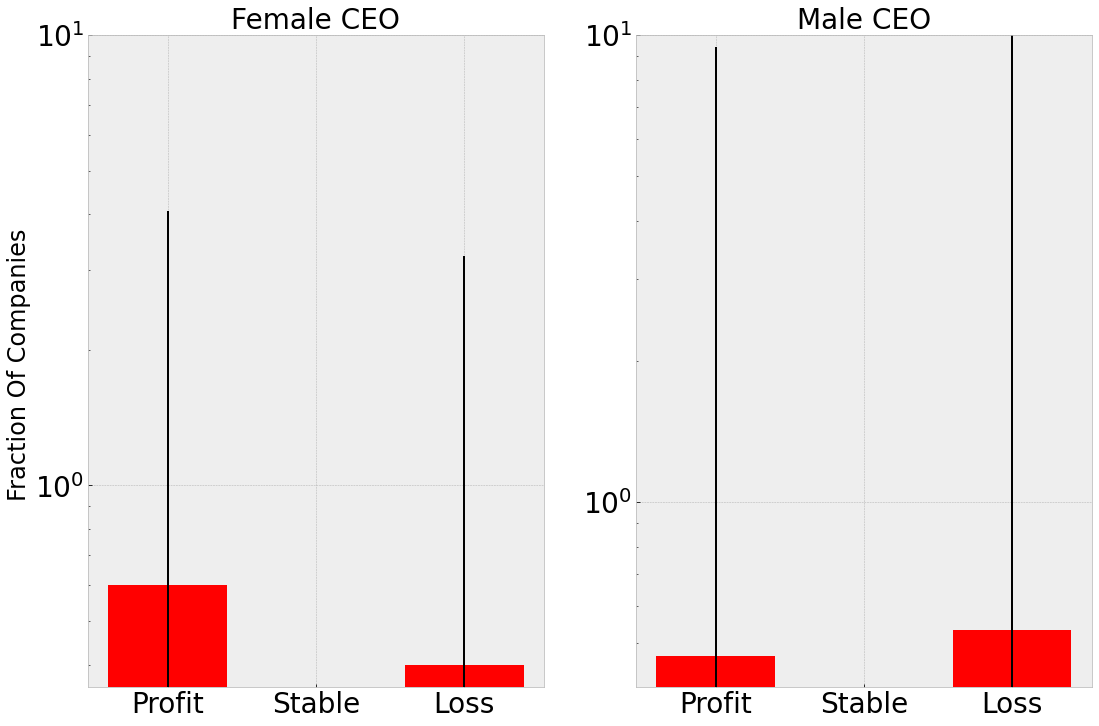

In [0]:
# Limit of y 
dy  = 10
pl.figure(figsize=(18,12))
aa = pl.subplot(121)
aa.bar(np.arange(len(xf)) , xf_arr2,yerr=np.sqrt(xf), color='r', label='female')
aa.set_xticks(np.arange(len(xf)))
aa.set_xticklabels([i for i in xtk])
pl.ylabel("Fraction Of Companies ", **axis_font)
pl.title('Female CEO')

pl.yscale('log')
pl.ylim((-50, 10^0))   # set the xlim to left, right

bb = pl.subplot(122)
bb.bar(np.arange(len(xm)) , xm_arr2,yerr = np.sqrt(xm), color='r', label='all')
bb.set_xticks(np.arange(len(xf)))
bb.set_xticklabels([i for i in xtk])
pl.title('Male CEO')
pl.yscale('log')
pl.ylim((-50, 10^0))   # set the xlim to left, right

pl.savefig( 'POC_female_all_hist'+ '.png')


## T-test

In [0]:
 from scipy import stats
np.random.seed(12345678)

In [0]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs1.shape

(500,)

In [0]:
 rvs2 = stats.norm.rvs(loc=5,scale=10,size=600)

In [0]:
t_val, p_val = stats.ttest_ind(rvs1,rvs2)
print(t_val, p_val)
print(t_val)


-0.6805827867776314 0.49627900646506007
-0.6805827867776314


# Done !